## Trabalho MVP 02
# Sprint II: Análise de Dados e Boas Práticas (40530010055_20230_02)

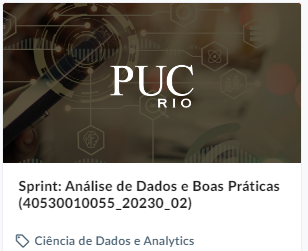

Rodolfo Montoya



## Utilização de base de dados para ánalise de dados

**Objetivo:**

Criar um notebook seguindo as boas práticas de codificação vistas na disciplina.

**Descrição do problema**

O problema escolhido foi sobre danos após um sismo em diferentes lugares do mundo, existem diferentes bases de dados conhecidas sobre este assunto.

**Restrições ou condições da seleção dos dados**

Inicialmente os dados foram adotados em função da maginutude e danos.

**Descrição do sismos**

O sismos foi obtido do site https://www.kaggle.com/datasets/usgs/earthquake-database

As informações obtidas que foram colocadas como atributos inicialmente obtidos da base de dados: 38 atributos.
Um problema de aprendizado não supervisionado, onde as premissas ou hipóteses, seriam que quanto maior a magnitude e menor o foco de distãncia teremos maiores danos em total.
Vamos restringir a dados existentes de latitude e longitude e encontrar as posições para determinar onde tem maior quantidade de sismos e qual seria uma previsão de danos.
Os atributos dos 38 que serão utilizados após análise são:

Year, Location Name, Latitude, Longitude, Focal Depth (km), Mag, Total Deaths, Total Missing, Total Injuries, Total Damage ($Mil), Total Houses Destroyed,  Total Houses Damaged.

E criaremos uma coluna final total

##**Check list**

Definição do problema
Objetivo: Feito

Qual é a descrição do problema?: Feito

Análise de dados: Feito

Estatísticas descritivas: Feito

Visualizações: Feito

Pré-processamento de dados: Feito

Variaveis, programas, utilitários importantes para utilizar o código

In [67]:
import warnings # Configuração para não exibir os warnings
warnings.filterwarnings("ignore")
!pip install -q basemap pillow
from matplotlib import cm
from datetime import datetime
from IPython.display import HTML
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import missingno as ms # para tratamento de missings

#Importação de variaveis em geral
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # biblioteca para trabalhar com computação numéricas
import matplotlib.pyplot as plt # biblioteca para trabalhar com operações matemáticas
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)


Vamos criar uma lista com países e continentes

In [68]:
#criação referencias paises continentes esta base de dados foi baixada as informações da internet e criada um arquivo csv
url = "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/PAISES.CSV"
paises = pd.read_csv(url, delimiter=',') # Lê o arquivo
paises['Country'] = paises['Country'].str.upper()
paises['Continents'] = paises['Continents'].str.upper()
paises.head(5)#Vou mostrar somente 10 dados

Country Continents
0     AFGHANISTAN       ASIA
1   ÅLAND ISLANDS     EUROPE
2         ALBANIA     EUROPE
3         ALGERIA     AFRICA
4  AMERICAN SAMOA    OCEANIA

In [69]:
# Verifica a distribuição das classes
paises.groupby('Continents').size()

Continents
AFRICA           60
ANTARCTICA        1
ASIA             50
EUROPE           52
NORTH AMERICA    41
OCEANIA          29
SOUTH AMERICA    16
dtype: int64

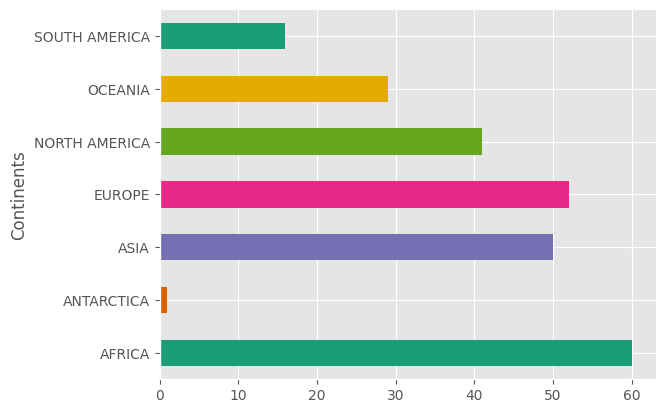

In [70]:
#Mostra países por continente
from matplotlib import pyplot as plt
import seaborn as sns
paises.groupby('Continents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Vamos criar nossa base de dados de sismos
Nesta Base de dados, vamos análisar os dados, verificando se há alguma inconsistencia, filtrar, e realizar Estatística descritiva.

In [71]:
# Carga da base de dados dos sismos
url = "https://raw.githubusercontent.com/MontoyaFamilia/MVPMontoya/main/earthquakes.csv"
sismos = pd.read_csv(url, delimiter=',') # Lê o arquivo
sismos.head()#Vou mostrar somente 10 dados

Year  Mo  Dy  Hr  Mn  Sec  Tsu     Vol  \
0     NaN NaN NaN NaN NaN  NaN  NaN     NaN   
1 -2150.0 NaN NaN NaN NaN  0.0  NaN     NaN   
2 -2000.0 NaN NaN NaN NaN  NaN  1.0     NaN   
3 -2000.0 NaN NaN NaN NaN  NaN  NaN     NaN   
4 -1610.0 NaN NaN NaN NaN  NaN  3.0  1351.0   

                       Location Name  Latitude  Longitude  Focal Depth (km)  \
0                                NaN       NaN        NaN               NaN   
1      JORDAN:  BAB-A-DARAA,AL-KARAK    31.100       35.5               NaN   
2                     SYRIA:  UGARIT    35.683       35.8               NaN   
3                   TURKMENISTAN:  W    38.000       58.2              18.0   
4  GREECE:  THERA ISLAND (SANTORINI)    36.400       25.4               NaN   

   Mag  MMI Int  Deaths  Death Description  Missing  Missing Description  \
0  NaN      NaN     NaN                NaN      NaN                  NaN   
1  7.3      NaN     NaN                NaN      NaN                  NaN   
2  NaN     10.0     NaN                3.0      NaN                  NaN   
3  7.1     10.0     1.0                1.0      NaN                  NaN   
4  NaN      NaN     NaN                NaN      NaN                  NaN   

   Injuries  Injuries Description  Damage ($Mil)  Damage Description  \
0       NaN                   NaN            NaN                 NaN   
1       NaN                   NaN            NaN                 3.0   
2       NaN                   NaN            NaN                 NaN   
3       NaN                   NaN            NaN                 1.0   
4       NaN                   NaN            NaN                 NaN   

   Houses Destroyed  Houses Destroyed Description  Houses Damaged  \
0               NaN                           NaN             NaN   
1               NaN                           NaN             NaN   
2               NaN                           NaN             NaN   
3               NaN                           1.0             NaN   
4               NaN                           NaN             NaN   

   Houses Damaged Description  Total Deaths  Total Death Description  \
0                         NaN           NaN                      NaN   
1                         NaN           NaN                      NaN   
2                         NaN           NaN                      3.0   
3                         NaN           1.0                      1.0   
4                         NaN           NaN                      3.0   

   Total Missing  Total Missing Description  Total Injuries  \
0            NaN                        NaN             NaN   
1            NaN                        NaN             NaN   
2            NaN                        NaN             NaN   
3            NaN                        NaN             NaN   
4            NaN                        NaN             NaN   

   Total Injuries Description  Total Damage ($Mil)  Total Damage Description  \
0                         NaN                  NaN                       NaN   
1                         NaN                  NaN                       NaN   
2                         NaN                  NaN                       NaN   
3                         NaN                  NaN                       1.0   
4                         NaN                  NaN                       3.0   

   Total Houses Destroyed  Total Houses Destroyed Description  \
0                     NaN                                 NaN   
1                     NaN                                 NaN   
2                     NaN                                 NaN   
3                     NaN                                 1.0   
4                     NaN                                 NaN   

   Total Houses Damaged  Total Houses Damaged Description  
0                   NaN                               NaN  
1                   NaN                               NaN  
2                   NaN                               NaN  
3                 

In [72]:
# Mostra as informações do sismos- Análise de dados
sismos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                6349 non-null   float64
 1   Mo                                  5939 non-null   float64
 2   Dy                                  5783 non-null   float64
 3   Hr                                  4300 non-null   float64
 4   Mn                                  4095 non-null   float64
 5   Sec                                 4390 non-null   float64
 6   Tsu                                 1958 non-null   float64
 7   Vol                                 77 non-null     float64
 8   Location Name                       6348 non-null   object 
 9   Latitude                            6297 non-null   float64
 10  Longitude                           6297 non-null   float64
 11  Focal Depth (km)                    3384 no

In [73]:
# Mostra dimensões da base de dados - Análise de dados
sismos.shape

(6350, 38)

In [74]:
# verificando nulls no dataset - Análise de dados, aqui observamos quais elementos são menos ou mais importantes
sismos.isnull().sum()

Year                                     1
Mo                                     411
Dy                                     567
Hr                                    2050
Mn                                    2255
Sec                                   1960
Tsu                                   4392
Vol                                   6273
Location Name                            2
Latitude                                53
Longitude                               53
Focal Depth (km)                      2966
Mag                                   1776
MMI Int                               3288
Deaths                                4220
Death Description                     3737
Missing                               6324
Missing Description                   6324
Injuries                              5002
Injuries Description                  4777
Damage ($Mil)                         5804
Damage Description                    1756
Houses Destroyed                      5493
Houses Dest

Muitos dados estão com infomrações faltantes Vamos eliminar as colunas Description e colunas com informações repetidas seriam as colunas sem Total

In [75]:
# Verifica a distribuição das classes - Estatística descritiva de cada base de dados
sismos.groupby('Injuries Description').size()

Injuries Description
1.0    790
2.0    215
3.0    407
4.0    161
dtype: int64

Para não ter problemas de alteração da Base de dados iniciais vamos copiar ela com um novo nome e criar uma Base de dados, que vamos limpar e em função de nossas premissas vamos formatar do melhor jeito possível.

<Axes: >

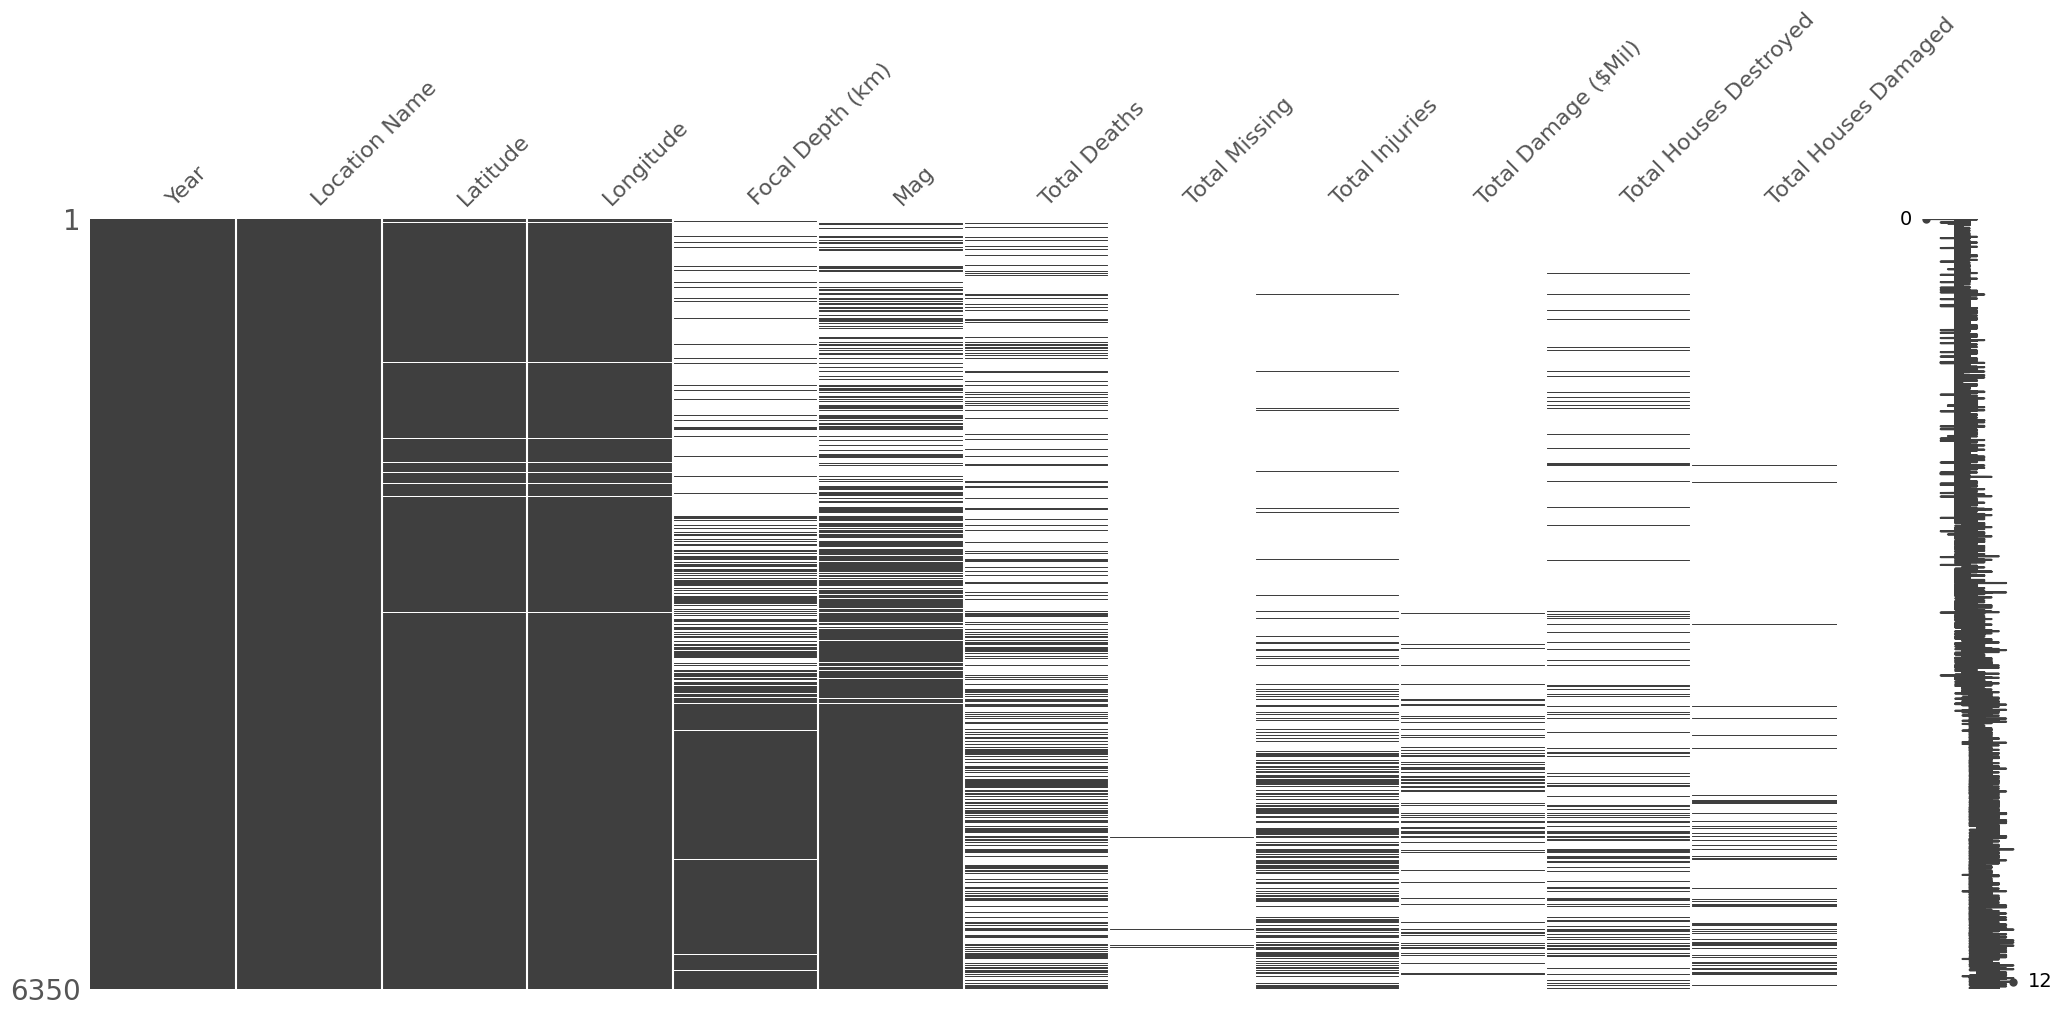

In [76]:
# salvando um novo dataset para tratamento de missings
# recuperando os nomes das colunas
col = list(sismos.columns)

# o novo dataset irá conter todas as colunas do dataset original
sismosSM = sismos[col[:]]

# removendo as colunas que têm informações vazias ou não importante para nossa análise
sismosSM.drop(['Mo','Dy','Hr','Mn','Sec','Tsu','Vol','MMI Int', 'Death Description', 'Deaths', 'Death Description', 'Missing', 'Missing Description', 'Injuries','Injuries Description','Damage ($Mil)','Damage Description', 'Houses Destroyed', 'Houses Destroyed Description', 'Houses Damaged', 'Houses Damaged Description','Total Injuries Description', 'Total Missing Description','Total Damage Description','Total Houses Destroyed Description','Total Houses Damaged Description', 'Total Death Description'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(sismosSM)

ELiminando coluna que tenha so valores nulos

In [77]:
#Eliminando colunas que tenha toda ela valores nulos, ou seja que não contribua com nossa análise
sismosSM=sismosSM.dropna(how="all")
sismosSM.head(10)

Year                      Location Name  Latitude  Longitude  \
1  -2150.0      JORDAN:  BAB-A-DARAA,AL-KARAK    31.100       35.5   
2  -2000.0                     SYRIA:  UGARIT    35.683       35.8   
3  -2000.0                   TURKMENISTAN:  W    38.000       58.2   
4  -1610.0  GREECE:  THERA ISLAND (SANTORINI)    36.400       25.4   
5  -1566.0           ISRAEL:  ARIHA (JERICHO)    31.500       35.3   
6  -1450.0               ITALY:  LACUS CIMINI    35.500       25.5   
7  -1365.0                      SYRIAN COASTS    35.683       35.8   
8  -1250.0           ISRAEL:  ARIHA (JERICHO)    32.000       35.5   
9  -1050.0   JORDAN:  SW:  TIMNA COPPER MINES    29.600       35.0   
10  -759.0                 ISRAEL:  JERUSALEM    33.000       35.5   

    Focal Depth (km)  Mag  Total Deaths  Total Missing  Total Injuries  \
1                NaN  7.3           NaN            NaN             NaN   
2                NaN  NaN           NaN            NaN             NaN   
3               18.0  7.1           1.0            NaN             NaN   
4                NaN  NaN           NaN            NaN             NaN   
5                NaN  NaN           NaN            NaN             NaN   
6                NaN  NaN           NaN            NaN             NaN   
7                NaN  NaN           NaN            NaN             NaN   
8                NaN  6.5           NaN            NaN             NaN   
9                NaN  6.2           NaN            NaN             NaN   
10               NaN  NaN           NaN            NaN             NaN   

    Total Damage ($Mil)  Total Houses Destroyed  Total Houses Damaged  
1                   NaN                     NaN                   NaN  
2                   NaN                     NaN                   NaN  
3                   NaN                     NaN                   NaN  
4                   NaN                     NaN                   NaN  
5                   NaN                     NaN                   NaN  
6                   NaN                     NaN                   NaN  
7                   NaN                     NaN                   NaN  
8                   NaN                     NaN                   NaN  
9                   NaN                     NaN                   NaN  
10                  NaN                     NaN                   NaN

In [78]:
# Verifica a distribuição das classes, verifico novamente para ver como estão os nulos
sismosSM.isnull().sum()

Year                         0
Location Name                1
Latitude                    52
Longitude                   52
Focal Depth (km)          2965
Mag                       1775
Total Deaths              4410
Total Missing             6320
Total Injuries            4980
Total Damage ($Mil)       5828
Total Houses Destroyed    5460
Total Houses Damaged      5862
dtype: int64

In [79]:
# Faz um resumo estatístico do sismos (média, desvio padrão, mínimo, máximo e os quartis) - Estatística descritiva de cada base de dados
sismosSM.describe()

Year     Latitude    Longitude  Focal Depth (km)          Mag  \
count  6349.000000  6297.000000  6297.000000       3384.000000  4574.000000   
mean   1808.959206    22.302839    38.101766         40.425236     6.449891   
std     374.072085    22.901411    86.803671         70.058978     1.037815   
min   -2150.000000   -62.877000  -179.984000          0.000000     1.600000   
25%    1823.000000     9.203000    -8.000000         10.000000     5.700000   
50%    1930.000000    31.959000    43.500000         24.000000     6.500000   
75%    1990.000000    38.700000   115.323000         38.000000     7.300000   
max    2023.000000    73.122000   180.000000        675.000000     9.500000   

        Total Deaths  Total Missing  Total Injuries  Total Damage ($Mil)  \
count    1939.000000      29.000000     1369.000000           521.000000   
mean     3852.760701    1675.482759     2487.620891          1709.802088   
std     26623.129699    8048.092252    27034.506305         11684.116542   
min         1.000000       1.000000        1.000000             0.010000   
25%         3.000000       5.000000       10.000000             5.000000   
50%        18.000000      25.000000       42.000000            28.000000   
75%       269.000000     138.000000      200.000000           285.000000   
max    830000.000000   43476.000000   799000.000000        220136.600000   

       Total Houses Destroyed  Total Houses Damaged  
count            8.890000e+02          4.870000e+02  
mean             1.778891e+04          5.351718e+04  
std              1.877183e+05          9.519156e+05  
min              1.000000e+00          1.000000e+00  
25%              6.700000e+01          1.000000e+02  
50%              5.060000e+02          7.000000e+02  
75%              3.400000e+03          3.308500e+03  
max              5.360000e+06          2.100000e+07

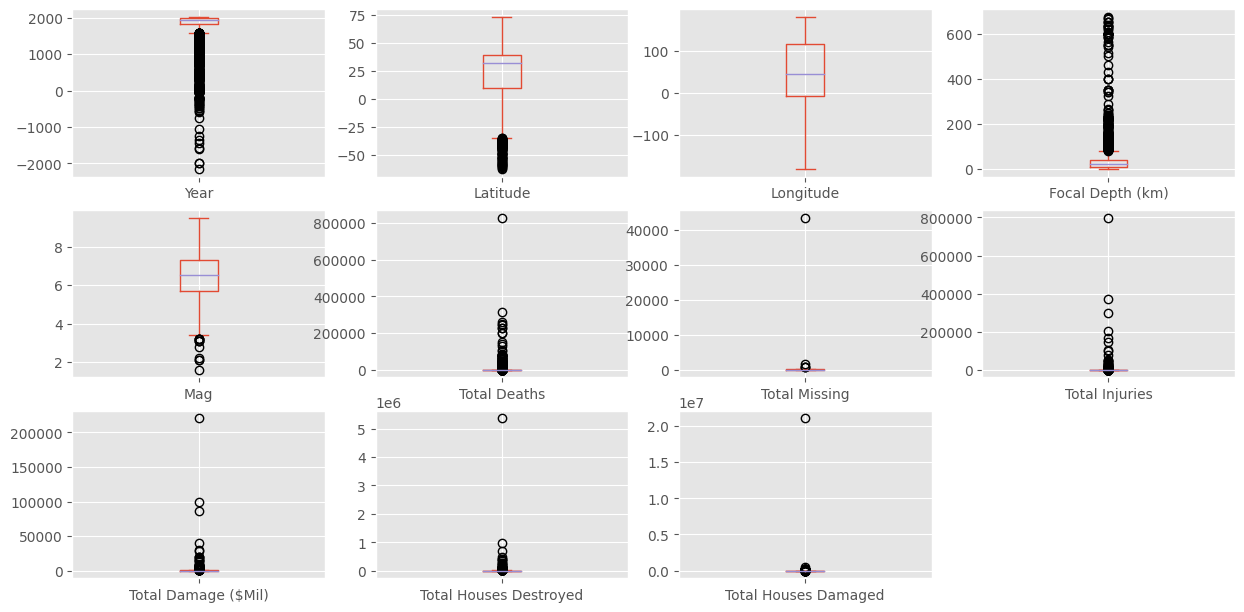

In [80]:
# Boxplot - Quero verificar como está no inicio depois do tratamento de dados se há outlier etc
sismosSM.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Observamos inicialmente que a nossa base de dados ainda com menos quantidade de elementos tem varios outlier

In [81]:
#Vamos excluir os outliers utilizando funções
def exclui_outliers(DataFrame, col_name):
  intervalo = 2.7*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[DataFrame[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[DataFrame[col_name] > (media + intervalo), col_name] = np.nan

numerical_cols = ['Total Deaths','Total Missing','Total Injuries','Total Damage ($Mil)','Total Houses Destroyed','Total Houses Damaged']
for col in numerical_cols:
  exclui_outliers(sismosSM, col)

sismosSM.head(10)

Year                      Location Name  Latitude  Longitude  \
1  -2150.0      JORDAN:  BAB-A-DARAA,AL-KARAK    31.100       35.5   
2  -2000.0                     SYRIA:  UGARIT    35.683       35.8   
3  -2000.0                   TURKMENISTAN:  W    38.000       58.2   
4  -1610.0  GREECE:  THERA ISLAND (SANTORINI)    36.400       25.4   
5  -1566.0           ISRAEL:  ARIHA (JERICHO)    31.500       35.3   
6  -1450.0               ITALY:  LACUS CIMINI    35.500       25.5   
7  -1365.0                      SYRIAN COASTS    35.683       35.8   
8  -1250.0           ISRAEL:  ARIHA (JERICHO)    32.000       35.5   
9  -1050.0   JORDAN:  SW:  TIMNA COPPER MINES    29.600       35.0   
10  -759.0                 ISRAEL:  JERUSALEM    33.000       35.5   

    Focal Depth (km)  Mag  Total Deaths  Total Missing  Total Injuries  \
1                NaN  7.3           NaN            NaN             NaN   
2                NaN  NaN           NaN            NaN             NaN   
3               18.0  7.1           1.0            NaN             NaN   
4                NaN  NaN           NaN            NaN             NaN   
5                NaN  NaN           NaN            NaN             NaN   
6                NaN  NaN           NaN            NaN             NaN   
7                NaN  NaN           NaN            NaN             NaN   
8                NaN  6.5           NaN            NaN             NaN   
9                NaN  6.2           NaN            NaN             NaN   
10               NaN  NaN           NaN            NaN             NaN   

    Total Damage ($Mil)  Total Houses Destroyed  Total Houses Damaged  
1                   NaN                     NaN                   NaN  
2                   NaN                     NaN                   NaN  
3                   NaN                     NaN                   NaN  
4                   NaN                     NaN                   NaN  
5                   NaN                     NaN                   NaN  
6                   NaN                     NaN                   NaN  
7                   NaN                     NaN                   NaN  
8                   NaN                     NaN                   NaN  
9                   NaN                     NaN                   NaN  
10                  NaN                     NaN                   NaN

In [82]:
# Faz um resumo estatístico do sismos (média, desvio padrão, mínimo, máximo e os quartis)
sismosSM.describe()

Year     Latitude    Longitude  Focal Depth (km)          Mag  \
count  6349.000000  6297.000000  6297.000000       3384.000000  4574.000000   
mean   1808.959206    22.302839    38.101766         40.425236     6.449891   
std     374.072085    22.901411    86.803671         70.058978     1.037815   
min   -2150.000000   -62.877000  -179.984000          0.000000     1.600000   
25%    1823.000000     9.203000    -8.000000         10.000000     5.700000   
50%    1930.000000    31.959000    43.500000         24.000000     6.500000   
75%    1990.000000    38.700000   115.323000         38.000000     7.300000   
max    2023.000000    73.122000   180.000000        675.000000     9.500000   

       Total Deaths  Total Missing  Total Injuries  Total Damage ($Mil)  \
count   1917.000000      28.000000     1360.000000           517.000000   
mean    1794.555556     182.607143      832.093382           860.097269   
std     7235.259554     381.220004     3861.245202          3009.733044   
min        1.000000       1.000000        1.000000             0.010000   
25%        3.000000       4.500000       10.000000             5.000000   
50%       17.000000      23.000000       41.000000            25.000000   
75%      231.000000     120.000000      200.000000           250.000000   
max    73000.000000    1755.000000    50000.000000         30000.000000   

       Total Houses Destroyed  Total Houses Damaged  
count              886.000000            486.000000  
mean              9932.668172          10417.423868  
std              39101.385739          38734.885740  
min                  1.000000              1.000000  
25%                 66.250000            100.000000  
50%                500.000000            700.000000  
75%               3324.750000           3270.500000  
max             498852.000000         500000.000000

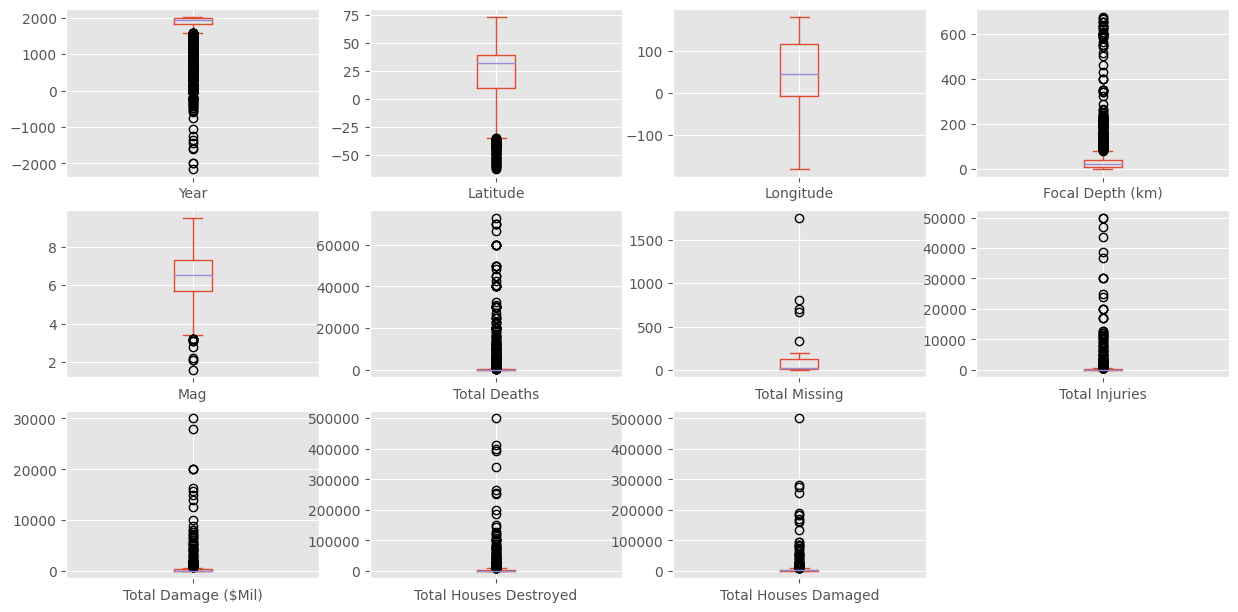

In [83]:
# Boxplot
sismosSM.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Observamos que melhorou muito a distribuição

Eliminando linhas que tenha ou Latitude ou Longitude ou Focal Depth ou Mag = Vazio, pois estes valores se não tiver não contribuem com a análise. Visto que senão temos esta informação não seria importante o dado para a ánalise.

In [84]:
# Eliminando linhas de Latitude e Longitude faltantes
sismosSM = sismosSM[sismosSM["Latitude"].notna()]
sismosSM.reset_index(drop=True)
sismosSM.head(10)

Year                      Location Name  Latitude  Longitude  \
1  -2150.0      JORDAN:  BAB-A-DARAA,AL-KARAK    31.100       35.5   
2  -2000.0                     SYRIA:  UGARIT    35.683       35.8   
3  -2000.0                   TURKMENISTAN:  W    38.000       58.2   
4  -1610.0  GREECE:  THERA ISLAND (SANTORINI)    36.400       25.4   
5  -1566.0           ISRAEL:  ARIHA (JERICHO)    31.500       35.3   
6  -1450.0               ITALY:  LACUS CIMINI    35.500       25.5   
7  -1365.0                      SYRIAN COASTS    35.683       35.8   
8  -1250.0           ISRAEL:  ARIHA (JERICHO)    32.000       35.5   
9  -1050.0   JORDAN:  SW:  TIMNA COPPER MINES    29.600       35.0   
10  -759.0                 ISRAEL:  JERUSALEM    33.000       35.5   

    Focal Depth (km)  Mag  Total Deaths  Total Missing  Total Injuries  \
1                NaN  7.3           NaN            NaN             NaN   
2                NaN  NaN           NaN            NaN             NaN   
3               18.0  7.1           1.0            NaN             NaN   
4                NaN  NaN           NaN            NaN             NaN   
5                NaN  NaN           NaN            NaN             NaN   
6                NaN  NaN           NaN            NaN             NaN   
7                NaN  NaN           NaN            NaN             NaN   
8                NaN  6.5           NaN            NaN             NaN   
9                NaN  6.2           NaN            NaN             NaN   
10               NaN  NaN           NaN            NaN             NaN   

    Total Damage ($Mil)  Total Houses Destroyed  Total Houses Damaged  
1                   NaN                     NaN                   NaN  
2                   NaN                     NaN                   NaN  
3                   NaN                     NaN                   NaN  
4                   NaN                     NaN                   NaN  
5                   NaN                     NaN                   NaN  
6                   NaN                     NaN                   NaN  
7                   NaN                     NaN                   NaN  
8                   NaN                     NaN                   NaN  
9                   NaN                     NaN                   NaN  
10                  NaN                     NaN                   NaN

<Axes: >

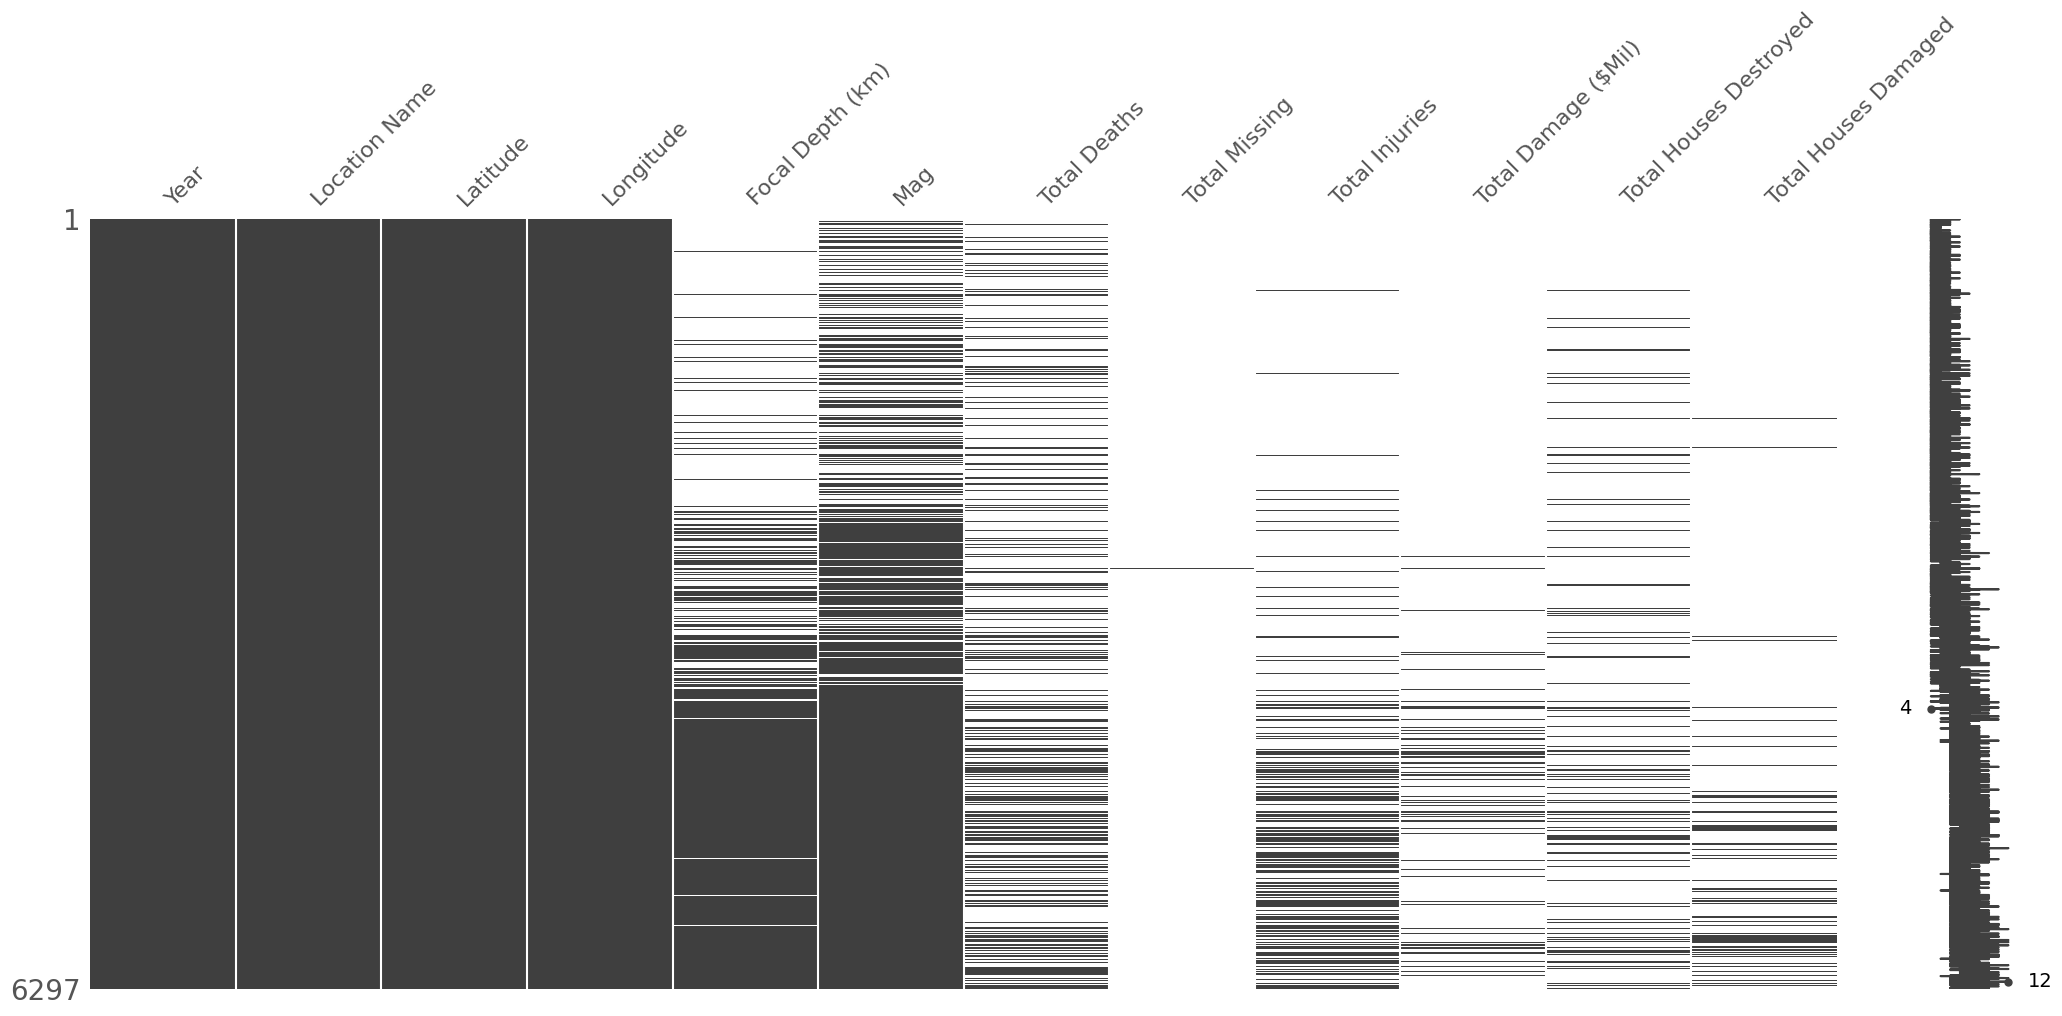

In [85]:
ms.matrix(sismosSM)

In [86]:
# Vou substituir os dados faltantes da coluna Focal Depth (km), utilizaremos a Mediana da coluna Focal Depth (km)
Focal_mediana=sismosSM['Focal Depth (km)'].median()
sismosSM['Focal Depth (km)'].fillna(Focal_mediana,inplace=True)
sismosSM.head(10)

Year                      Location Name  Latitude  Longitude  \
1  -2150.0      JORDAN:  BAB-A-DARAA,AL-KARAK    31.100       35.5   
2  -2000.0                     SYRIA:  UGARIT    35.683       35.8   
3  -2000.0                   TURKMENISTAN:  W    38.000       58.2   
4  -1610.0  GREECE:  THERA ISLAND (SANTORINI)    36.400       25.4   
5  -1566.0           ISRAEL:  ARIHA (JERICHO)    31.500       35.3   
6  -1450.0               ITALY:  LACUS CIMINI    35.500       25.5   
7  -1365.0                      SYRIAN COASTS    35.683       35.8   
8  -1250.0           ISRAEL:  ARIHA (JERICHO)    32.000       35.5   
9  -1050.0   JORDAN:  SW:  TIMNA COPPER MINES    29.600       35.0   
10  -759.0                 ISRAEL:  JERUSALEM    33.000       35.5   

    Focal Depth (km)  Mag  Total Deaths  Total Missing  Total Injuries  \
1               24.0  7.3           NaN            NaN             NaN   
2               24.0  NaN           NaN            NaN             NaN   
3               18.0  7.1           1.0            NaN             NaN   
4               24.0  NaN           NaN            NaN             NaN   
5               24.0  NaN           NaN            NaN             NaN   
6               24.0  NaN           NaN            NaN             NaN   
7               24.0  NaN           NaN            NaN             NaN   
8               24.0  6.5           NaN            NaN             NaN   
9               24.0  6.2           NaN            NaN             NaN   
10              24.0  NaN           NaN            NaN             NaN   

    Total Damage ($Mil)  Total Houses Destroyed  Total Houses Damaged  
1                   NaN                     NaN                   NaN  
2                   NaN                     NaN                   NaN  
3                   NaN                     NaN                   NaN  
4                   NaN                     NaN                   NaN  
5                   NaN                     NaN                   NaN  
6                   NaN                     NaN                   NaN  
7                   NaN                     NaN                   NaN  
8                   NaN                     NaN                   NaN  
9                   NaN                     NaN                   NaN  
10                  NaN                     NaN                   NaN

<Axes: >

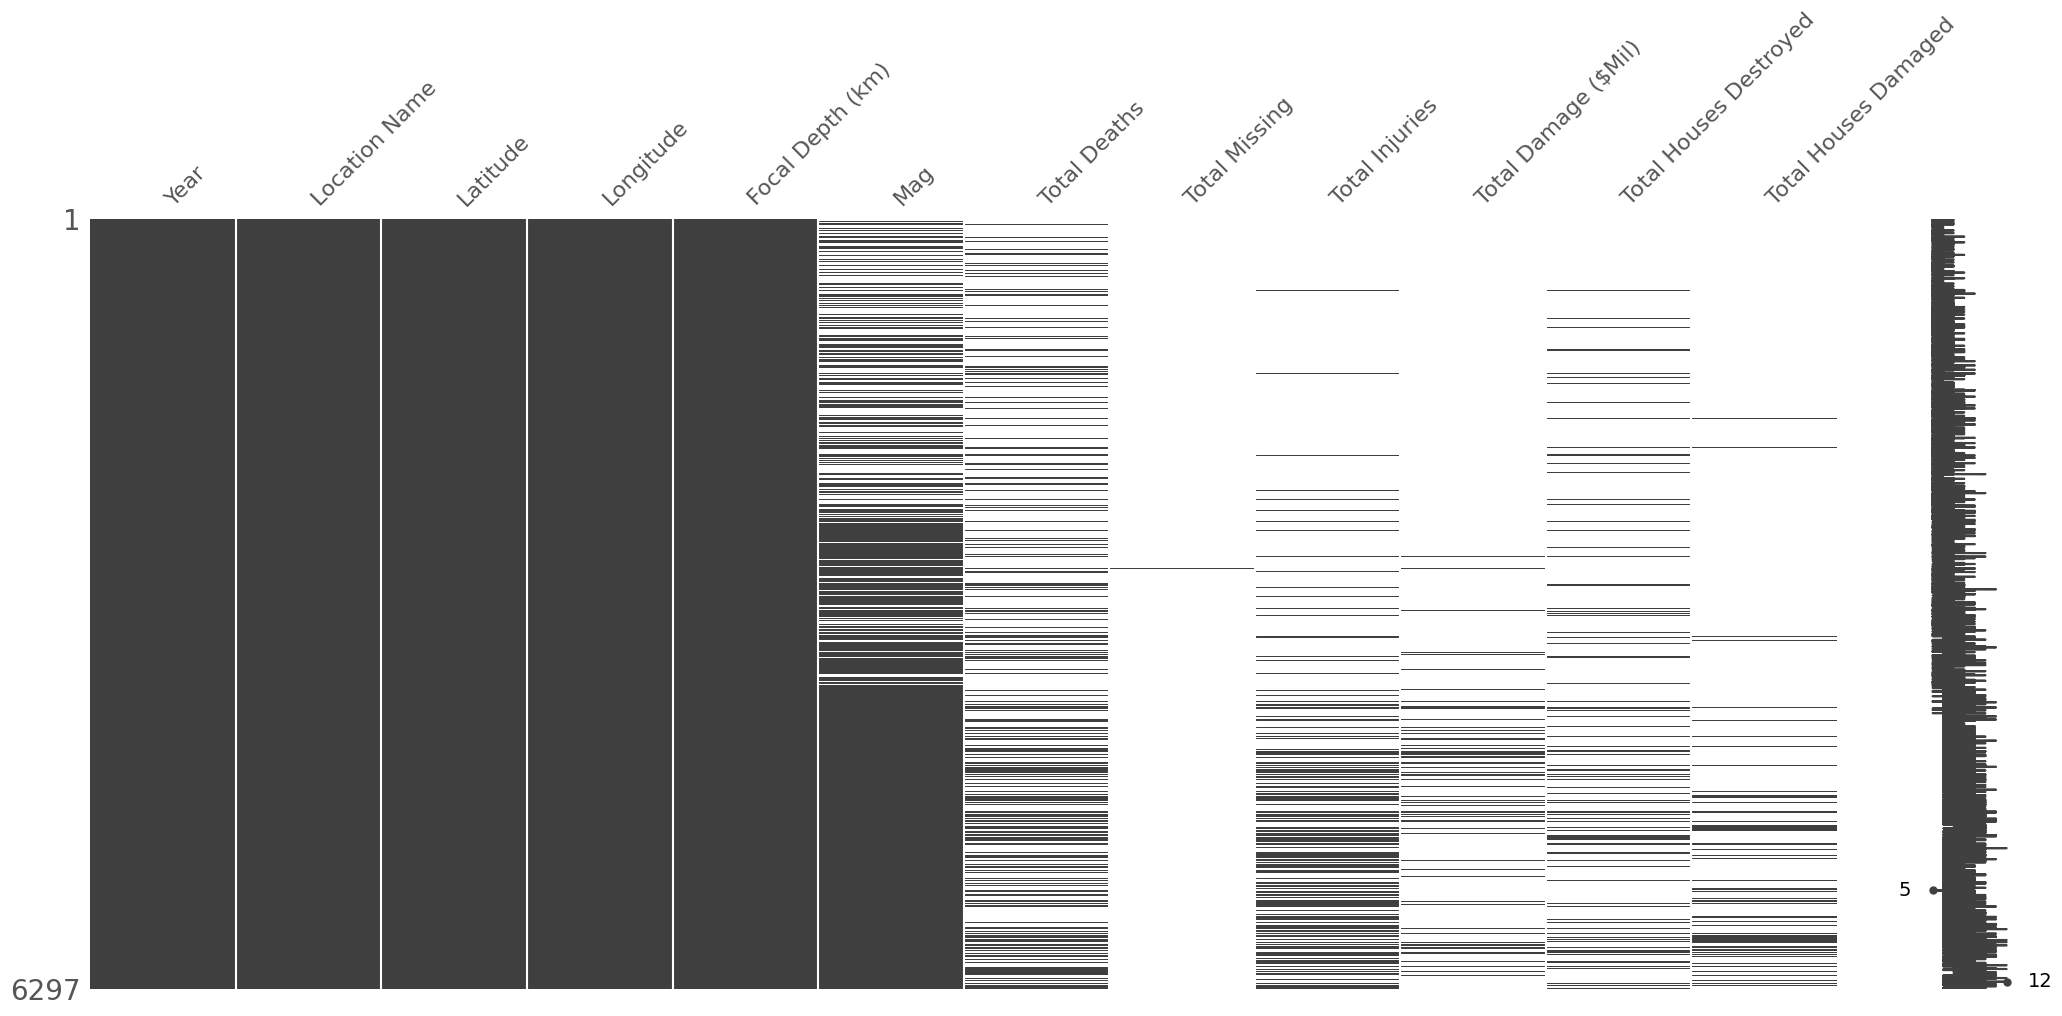

In [87]:
ms.matrix(sismosSM)

In [88]:
# verificando novamente nulls no dataset
sismosSM.isnull().sum()

Year                         0
Location Name                1
Latitude                     0
Longitude                    0
Focal Depth (km)             0
Mag                       1725
Total Deaths              4382
Total Missing             6269
Total Injuries            4937
Total Damage ($Mil)       5780
Total Houses Destroyed    5413
Total Houses Damaged      5811
dtype: int64

In [89]:
# Eliminando linhas de Magnitude faltantes
sismosSM = sismosSM[sismosSM["Mag"].notna()]
sismosSM.reset_index(drop=True)
sismosSM.head(10)
#Podemos tambem em vez de deletar colocar um quartil de 25%

Year                     Location Name  Latitude  Longitude  \
1  -2150.0     JORDAN:  BAB-A-DARAA,AL-KARAK     31.10      35.50   
3  -2000.0                  TURKMENISTAN:  W     38.00      58.20   
8  -1250.0          ISRAEL:  ARIHA (JERICHO)     32.00      35.50   
9  -1050.0  JORDAN:  SW:  TIMNA COPPER MINES     29.60      35.00   
15  -479.0                GREECE:  MACEDONIA     39.70      23.30   
17  -426.0                   GREECE:  EUBOEA     38.90      22.70   
18  -400.0            IRAN:  REY,EIVAN-E-KAY     35.50      51.80   
19  -373.0                            GREECE     38.25      22.25   
21  -330.0               GREECE:  AEGEAN SEA     40.00      25.00   
25  -250.0            KYRGYZSTAN:  CHIGUCHIN     42.70      77.50   

    Focal Depth (km)  Mag  Total Deaths  Total Missing  Total Injuries  \
1               24.0  7.3           NaN            NaN             NaN   
3               18.0  7.1           1.0            NaN             NaN   
8               24.0  6.5           NaN            NaN             NaN   
9               24.0  6.2           NaN            NaN             NaN   
15              24.0  7.0           NaN            NaN             NaN   
17              24.0  7.1        2500.0            NaN             NaN   
18              24.0  7.6           NaN            NaN             NaN   
19              24.0  7.3           NaN            NaN             NaN   
21              24.0  7.0           NaN            NaN             NaN   
25              20.0  6.7           NaN            NaN             NaN   

    Total Damage ($Mil)  Total Houses Destroyed  Total Houses Damaged  
1                   NaN                     NaN                   NaN  
3                   NaN                     NaN                   NaN  
8                   NaN                     NaN                   NaN  
9                   NaN                     NaN                   NaN  
15                  NaN                     NaN                   NaN  
17                  NaN                     NaN                   NaN  
18                  NaN                     NaN                   NaN  
19                  NaN                     NaN                   NaN  
21                  NaN                     NaN                   NaN  
25                  NaN                     NaN                   NaN

In [90]:
# Faz um resumo estatístico do sismos (média, desvio padrão, mínimo, máximo e os quartis)
sismosSM.describe()

Year     Latitude    Longitude  Focal Depth (km)          Mag  \
count  4572.000000  4572.000000  4572.000000       4572.000000  4572.000000   
mean   1889.433946    20.453046    46.367979         35.737095     6.449869   
std     281.821185    23.882046    90.557762         60.070516     1.037989   
min   -2150.000000   -62.877000  -179.984000          0.000000     1.600000   
25%    1906.000000     2.810000     0.856750         15.000000     5.700000   
50%    1968.000000    29.379000    67.815000         24.000000     6.500000   
75%    2003.000000    38.300000   121.132750         33.000000     7.300000   
max    2023.000000    73.122000   180.000000        675.000000     9.500000   

       Total Deaths  Total Missing  Total Injuries  Total Damage ($Mil)  \
count   1739.000000      28.000000     1348.000000           516.000000   
mean    1412.549741     182.607143      837.854599           861.746682   
std     6228.419422     381.220004     3877.880133          3012.419798   
min        1.000000       1.000000        1.000000             0.010000   
25%        2.000000       4.500000       10.000000             4.875000   
50%       14.000000      23.000000       40.500000            25.635500   
75%      171.000000     120.000000      200.000000           250.000000   
max    73000.000000    1755.000000    50000.000000         30000.000000   

       Total Houses Destroyed  Total Houses Damaged  
count              843.000000            480.000000  
mean             10291.819692          10524.491667  
std              40032.492158          38964.560125  
min                  1.000000              1.000000  
25%                 61.500000             99.750000  
50%                500.000000            700.000000  
75%               3443.500000           3298.250000  
max             498852.000000         500000.000000

In [91]:
# verificando novamente nulls no dataset
sismosSM.isnull().sum()

Year                         0
Location Name                1
Latitude                     0
Longitude                    0
Focal Depth (km)             0
Mag                          0
Total Deaths              2833
Total Missing             4544
Total Injuries            3224
Total Damage ($Mil)       4056
Total Houses Destroyed    3729
Total Houses Damaged      4092
dtype: int64

In [92]:
#Substituindo todos os valores restantes que não houve informações por zero
sismosSM.fillna(0, inplace=True)
# verificando novamente nulls no dataset
sismosSM.isnull().sum()

Year                      0
Location Name             0
Latitude                  0
Longitude                 0
Focal Depth (km)          0
Mag                       0
Total Deaths              0
Total Missing             0
Total Injuries            0
Total Damage ($Mil)       0
Total Houses Destroyed    0
Total Houses Damaged      0
dtype: int64

In [93]:
sismosSM.describe()

Year     Latitude    Longitude  Focal Depth (km)          Mag  \
count  4572.000000  4572.000000  4572.000000       4572.000000  4572.000000   
mean   1889.433946    20.453046    46.367979         35.737095     6.449869   
std     281.821185    23.882046    90.557762         60.070516     1.037989   
min   -2150.000000   -62.877000  -179.984000          0.000000     1.600000   
25%    1906.000000     2.810000     0.856750         15.000000     5.700000   
50%    1968.000000    29.379000    67.815000         24.000000     6.500000   
75%    2003.000000    38.300000   121.132750         33.000000     7.300000   
max    2023.000000    73.122000   180.000000        675.000000     9.500000   

       Total Deaths  Total Missing  Total Injuries  Total Damage ($Mil)  \
count   4572.000000    4572.000000     4572.000000          4572.000000   
mean     537.275591       1.118329      247.031496            97.257500   
std     3901.338500      32.579697     2139.492118          1047.274109   
min        0.000000       0.000000        0.000000             0.000000   
25%        0.000000       0.000000        0.000000             0.000000   
50%        0.000000       0.000000        0.000000             0.000000   
75%        4.000000       0.000000        5.000000             0.000000   
max    73000.000000    1755.000000    50000.000000         30000.000000   

       Total Houses Destroyed  Total Houses Damaged  
count              4572.00000           4572.000000  
mean               1897.63867           1104.933508  
std               17639.13970          13019.521604  
min                   0.00000              0.000000  
25%                   0.00000              0.000000  
50%                   0.00000              0.000000  
75%                   0.00000              0.000000  
max              498852.00000         500000.000000

percebemos que os valores estatisticos dos quartis mudam todos para zero, o que não seria muito verdadeiro para nossa análise. Então vamos voltar para condição inicial

In [94]:
sismosSM.replace(0, np.nan, inplace=True)
sismosSM.describe()

Year     Latitude    Longitude  Focal Depth (km)          Mag  \
count  4572.000000  4568.000000  4572.000000       4560.000000  4572.000000   
mean   1889.433946    20.470956    46.367979         35.831140     6.449869   
std     281.821185    23.884827    90.557762         60.121497     1.037989   
min   -2150.000000   -62.877000  -179.984000          1.000000     1.600000   
25%    1906.000000     2.905750     0.856750         15.000000     5.700000   
50%    1968.000000    29.400000    67.815000         24.000000     6.500000   
75%    2003.000000    38.300000   121.132750         33.000000     7.300000   
max    2023.000000    73.122000   180.000000        675.000000     9.500000   

       Total Deaths  Total Missing  Total Injuries  Total Damage ($Mil)  \
count   1739.000000      28.000000     1348.000000           516.000000   
mean    1412.549741     182.607143      837.854599           861.746682   
std     6228.419422     381.220004     3877.880133          3012.419798   
min        1.000000       1.000000        1.000000             0.010000   
25%        2.000000       4.500000       10.000000             4.875000   
50%       14.000000      23.000000       40.500000            25.635500   
75%      171.000000     120.000000      200.000000           250.000000   
max    73000.000000    1755.000000    50000.000000         30000.000000   

       Total Houses Destroyed  Total Houses Damaged  
count              843.000000            480.000000  
mean             10291.819692          10524.491667  
std              40032.492158          38964.560125  
min                  1.000000              1.000000  
25%                 61.500000             99.750000  
50%                500.000000            700.000000  
75%               3443.500000           3298.250000  
max             498852.000000         500000.000000

Vamos criar uma coluna com pais e continente

In [95]:
# Verifica a distribuição das classes
sismosSM.groupby('Location Name').size()

Location Name
AFGHANISTAN                                   3
AFGHANISTAN-TAJIKISTAN:  RAKHOR               1
AFGHANISTAN-TAJIKISTAN:  YAR HUSAIN, ASTOR    1
AFGHANISTAN:  BADAKHSHAN, TAKHAR              1
AFGHANISTAN:  BADAKHSTAN PROVINCE             1
                                             ..
YELLOW SEA                                    1
YEMEN:  DHAMAR                                1
YEMEN:  RAZIH                                 1
YEMEN:  WESTERN  ARABIAN PENINSULA            1
ZAMBIA:  KAPUTA                               1
Length: 3003, dtype: int64

In [96]:
#Separando o Pais somente da Location Name para poder saber de qual continente é a linha, assim fizemos uma limpeza de dados
#Vamos limitar que antes do caracter ":" está o nome do país, porém em alguns casos houve um problema de ter outro caracter como ";" ai então substituímos
sismosSM["Location Name"]= sismosSM["Location Name"].str.replace(";", ":", case = False)
sismosSM["Location Name"]= sismosSM["Location Name"].str.replace(",", ":", case = False)
sismosSM["Location Name"]= sismosSM["Location Name"].str.replace("-", ":", case = False)
#E agora criamos a coluna country
sismosSM["Country"] = sismosSM["Location Name"].str.split(':').str.get(0)
sismosSM.reset_index(drop=True)
sismosSM.head(10)

Year                     Location Name  Latitude  Longitude  \
1  -2150.0     JORDAN:  BAB:A:DARAA:AL:KARAK     31.10      35.50   
3  -2000.0                  TURKMENISTAN:  W     38.00      58.20   
8  -1250.0          ISRAEL:  ARIHA (JERICHO)     32.00      35.50   
9  -1050.0  JORDAN:  SW:  TIMNA COPPER MINES     29.60      35.00   
15  -479.0                GREECE:  MACEDONIA     39.70      23.30   
17  -426.0                   GREECE:  EUBOEA     38.90      22.70   
18  -400.0            IRAN:  REY:EIVAN:E:KAY     35.50      51.80   
19  -373.0                            GREECE     38.25      22.25   
21  -330.0               GREECE:  AEGEAN SEA     40.00      25.00   
25  -250.0            KYRGYZSTAN:  CHIGUCHIN     42.70      77.50   

    Focal Depth (km)  Mag  Total Deaths  Total Missing  Total Injuries  \
1               24.0  7.3           NaN            NaN             NaN   
3               18.0  7.1           1.0            NaN             NaN   
8               24.0  6.5           NaN            NaN             NaN   
9               24.0  6.2           NaN            NaN             NaN   
15              24.0  7.0           NaN            NaN             NaN   
17              24.0  7.1        2500.0            NaN             NaN   
18              24.0  7.6           NaN            NaN             NaN   
19              24.0  7.3           NaN            NaN             NaN   
21              24.0  7.0           NaN            NaN             NaN   
25              20.0  6.7           NaN            NaN             NaN   

    Total Damage ($Mil)  Total Houses Destroyed  Total Houses Damaged  \
1                   NaN                     NaN                   NaN   
3                   NaN                     NaN                   NaN   
8                   NaN                     NaN                   NaN   
9                   NaN                     NaN                   NaN   
15                  NaN                     NaN                   NaN   
17                  NaN                     NaN                   NaN   
18                  NaN                     NaN                   NaN   
19                  NaN                     NaN                   NaN   
21                  NaN                     NaN                   NaN   
25                  NaN                     NaN                   NaN   

         Country  
1         JORDAN  
3   TURKMENISTAN  
8         ISRAEL  
9         JORDAN  
15        GREECE  
17        GREECE  
18          IRAN  
19        GREECE  
21        GREECE  
25    KYRGYZSTAN

In [97]:
# Verifica a distribuição das classes
sismosSM.groupby('Country').size()

Country
AFGHANISTAN         56
ALABAMA              1
ALASKA              70
ALASKA PENINSULA     3
ALBANIA             35
                    ..
WYOMING              2
YATSUSHIRO           1
YELLOW SEA           1
YEMEN                3
ZAMBIA               1
Length: 228, dtype: int64

<Axes: xlabel='Country'>

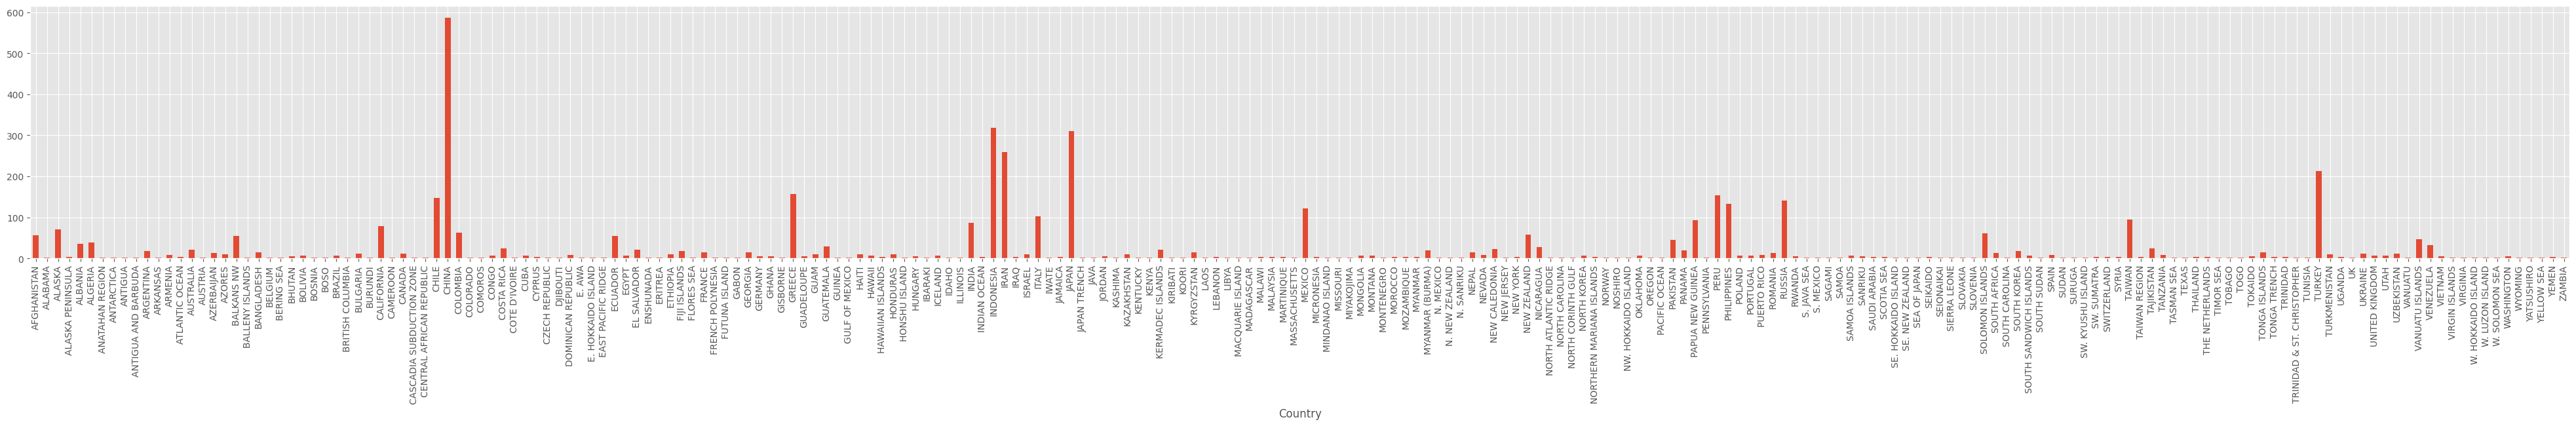

In [98]:
#Mostrando por pais
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 5))
sismosSM.groupby('Country').size().plot(kind='bar')

In [99]:
# Arrumando os indices que ficaram desarrumados pela manipulação de dados
sismosSM.index = np.arange(1, len(sismosSM) + 1)
sismosSM.head(10)

Year                     Location Name  Latitude  Longitude  \
1  -2150.0     JORDAN:  BAB:A:DARAA:AL:KARAK     31.10      35.50   
2  -2000.0                  TURKMENISTAN:  W     38.00      58.20   
3  -1250.0          ISRAEL:  ARIHA (JERICHO)     32.00      35.50   
4  -1050.0  JORDAN:  SW:  TIMNA COPPER MINES     29.60      35.00   
5   -479.0                GREECE:  MACEDONIA     39.70      23.30   
6   -426.0                   GREECE:  EUBOEA     38.90      22.70   
7   -400.0            IRAN:  REY:EIVAN:E:KAY     35.50      51.80   
8   -373.0                            GREECE     38.25      22.25   
9   -330.0               GREECE:  AEGEAN SEA     40.00      25.00   
10  -250.0            KYRGYZSTAN:  CHIGUCHIN     42.70      77.50   

    Focal Depth (km)  Mag  Total Deaths  Total Missing  Total Injuries  \
1               24.0  7.3           NaN            NaN             NaN   
2               18.0  7.1           1.0            NaN             NaN   
3               24.0  6.5           NaN            NaN             NaN   
4               24.0  6.2           NaN            NaN             NaN   
5               24.0  7.0           NaN            NaN             NaN   
6               24.0  7.1        2500.0            NaN             NaN   
7               24.0  7.6           NaN            NaN             NaN   
8               24.0  7.3           NaN            NaN             NaN   
9               24.0  7.0           NaN            NaN             NaN   
10              20.0  6.7           NaN            NaN             NaN   

    Total Damage ($Mil)  Total Houses Destroyed  Total Houses Damaged  \
1                   NaN                     NaN                   NaN   
2                   NaN                     NaN                   NaN   
3                   NaN                     NaN                   NaN   
4                   NaN                     NaN                   NaN   
5                   NaN                     NaN                   NaN   
6                   NaN                     NaN                   NaN   
7                   NaN                     NaN                   NaN   
8                   NaN                     NaN                   NaN   
9                   NaN                     NaN                   NaN   
10                  NaN                     NaN                   NaN   

         Country  
1         JORDAN  
2   TURKMENISTAN  
3         ISRAEL  
4         JORDAN  
5         GREECE  
6         GREECE  
7           IRAN  
8         GREECE  
9         GREECE  
10    KYRGYZSTAN

In [100]:
# Mostra as informações do sismos- Análise de dados
sismosSM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4572 entries, 1 to 4572
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    4572 non-null   float64
 1   Location Name           4571 non-null   object 
 2   Latitude                4568 non-null   float64
 3   Longitude               4572 non-null   float64
 4   Focal Depth (km)        4560 non-null   float64
 5   Mag                     4572 non-null   float64
 6   Total Deaths            1739 non-null   float64
 7   Total Missing           28 non-null     float64
 8   Total Injuries          1348 non-null   float64
 9   Total Damage ($Mil)     516 non-null    float64
 10  Total Houses Destroyed  843 non-null    float64
 11  Total Houses Damaged    480 non-null    float64
 12  Country                 4571 non-null   object 
dtypes: float64(11), object(2)
memory usage: 500.1+ KB


In [101]:
# Mostra as informações do sismos- Análise de dados
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     249 non-null    object
 1   Continents  249 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [102]:
# Foi criado uma coluna de continentes para agrupar posteriormente
sismosSM = pd.merge(sismosSM,paises,on='Country', how= 'inner')
sismosSM.head(10)

Year                                    Location Name  Latitude  \
0 -2150.0                    JORDAN:  BAB:A:DARAA:AL:KARAK    31.100   
1 -1050.0                 JORDAN:  SW:  TIMNA COPPER MINES    29.600   
2   362.0                                JORDAN:  AL:KARAK    31.300   
3  1834.0   JORDAN:  AL:KARAK: ISRAEL:  JERUSALEM: NABULUS    31.300   
4  2004.0  JORDAN:  MA'IN: ISRAEL:  JERUSALEM: PETAH:TIQWA    31.675   
5 -2000.0                                 TURKMENISTAN:  W    38.000   
6    10.0                              TURKMENISTAN:  NISA    38.000   
7   953.0                              TURKMENISTAN:  NISA    38.000   
8  1175.0                                     TURKMENISTAN    37.500   
9  1208.0                        TURKMENISTAN:  GURGANDZHE    42.000   

   Longitude  Focal Depth (km)  Mag  Total Deaths  Total Missing  \
0     35.500              24.0  7.3           NaN            NaN   
1     35.000              24.0  6.2           NaN            NaN   
2     35.600              24.0  6.4           NaN            NaN   
3     35.600              24.0  6.3           NaN            NaN   
4     35.551              27.0  5.3           NaN            NaN   
5     58.200              18.0  7.1           1.0            NaN   
6     58.300              18.0  7.1           NaN            NaN   
7     58.300              18.0  7.1           NaN            NaN   
8     65.500              15.0  7.1           NaN            NaN   
9     60.000              10.0  6.1           NaN            NaN   

   Total Injuries  Total Damage ($Mil)  Total Houses Destroyed  \
0             NaN                  NaN                     NaN   
1             NaN                  NaN                     NaN   
2             NaN                  NaN                     NaN   
3             NaN                  NaN                     NaN   
4             4.0                  NaN                     NaN   
5             NaN                  NaN                     NaN   
6             NaN                  NaN                     NaN   
7             NaN                  NaN                     NaN   
8             NaN                  NaN                     NaN   
9             NaN                  NaN                     NaN   

   Total Houses Damaged       Country Continents  
0                   NaN        JORDAN       ASIA  
1                   NaN        JORDAN       ASIA  
2                   NaN        JORDAN       ASIA  
3                   NaN        JORDAN       ASIA  
4                   NaN        JORDAN       ASIA  
5                   NaN  TURKMENISTAN       ASIA  
6                   NaN  TURKMENISTAN       ASIA  
7                   NaN  TURKMENISTAN       ASIA  
8                   NaN  TURKMENISTAN       ASIA  
9                   NaN  TURKMENISTAN       ASIA

<Axes: xlabel='Continents'>

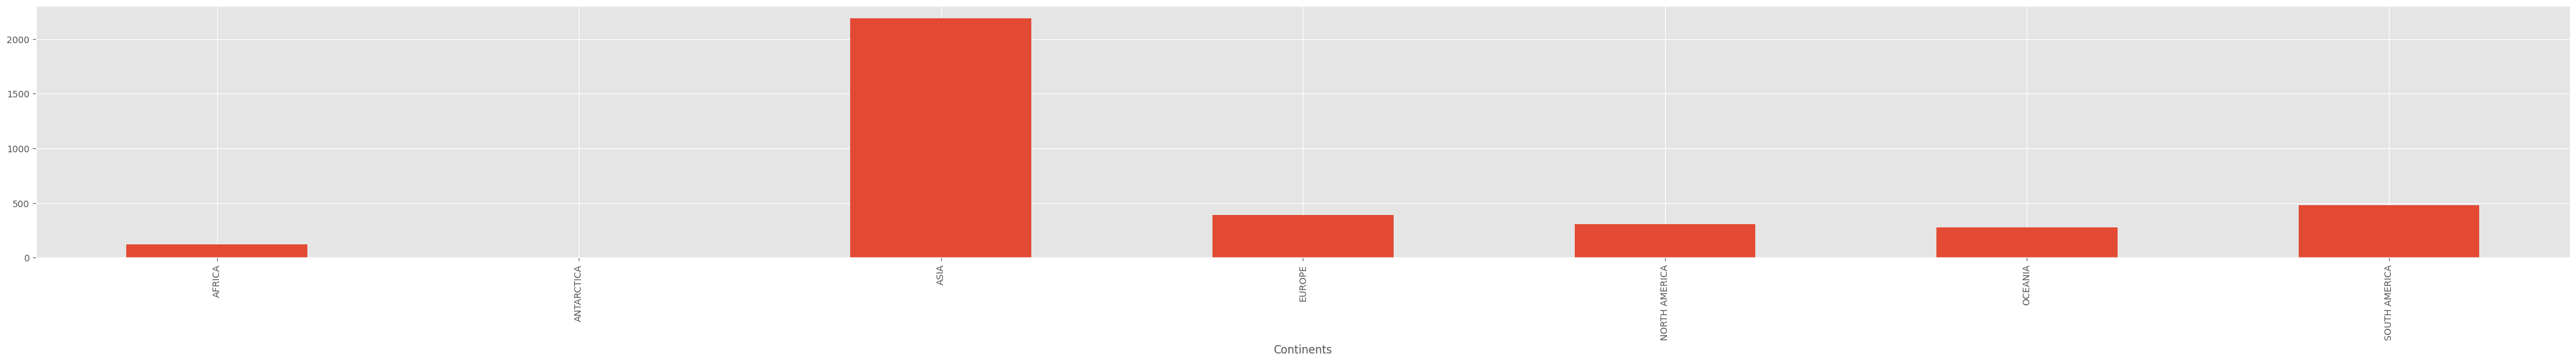

In [103]:
#Mostrando por continente
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 5))
sismosSM.groupby('Continents').size().plot(kind='bar')

Como exercicio de aprendizado, vamos normalizar a coluna de profundidade

In [104]:
#Normalização profundidade

def minmax_norm(df):
    return (df - df.min()) / (df.max() - df.min())

sismosSM['Focal Depth (km)']= minmax_norm(sismosSM['Focal Depth (km)'])
sismosSM.head()#Vou mostrar somente 10 dados

Year                                    Location Name  Latitude  \
0 -2150.0                    JORDAN:  BAB:A:DARAA:AL:KARAK    31.100   
1 -1050.0                 JORDAN:  SW:  TIMNA COPPER MINES    29.600   
2   362.0                                JORDAN:  AL:KARAK    31.300   
3  1834.0   JORDAN:  AL:KARAK: ISRAEL:  JERUSALEM: NABULUS    31.300   
4  2004.0  JORDAN:  MA'IN: ISRAEL:  JERUSALEM: PETAH:TIQWA    31.675   

   Longitude  Focal Depth (km)  Mag  Total Deaths  Total Missing  \
0     35.500          0.034691  7.3           NaN            NaN   
1     35.000          0.034691  6.2           NaN            NaN   
2     35.600          0.034691  6.4           NaN            NaN   
3     35.600          0.034691  6.3           NaN            NaN   
4     35.551          0.039216  5.3           NaN            NaN   

   Total Injuries  Total Damage ($Mil)  Total Houses Destroyed  \
0             NaN                  NaN                     NaN   
1             NaN                  NaN                     NaN   
2             NaN                  NaN                     NaN   
3             NaN                  NaN                     NaN   
4             4.0                  NaN                     NaN   

   Total Houses Damaged Country Continents  
0                   NaN  JORDAN       ASIA  
1                   NaN  JORDAN       ASIA  
2                   NaN  JORDAN       ASIA  
3                   NaN  JORDAN       ASIA  
4                   NaN  JORDAN       ASIA

In [105]:
# Vamos finalizar substituindo os Valores NaN por zero
sismosSM.replace(np.nan, 0,  inplace=True)
sismosSM.head(10)

Year                                    Location Name  Latitude  \
0 -2150.0                    JORDAN:  BAB:A:DARAA:AL:KARAK    31.100   
1 -1050.0                 JORDAN:  SW:  TIMNA COPPER MINES    29.600   
2   362.0                                JORDAN:  AL:KARAK    31.300   
3  1834.0   JORDAN:  AL:KARAK: ISRAEL:  JERUSALEM: NABULUS    31.300   
4  2004.0  JORDAN:  MA'IN: ISRAEL:  JERUSALEM: PETAH:TIQWA    31.675   
5 -2000.0                                 TURKMENISTAN:  W    38.000   
6    10.0                              TURKMENISTAN:  NISA    38.000   
7   953.0                              TURKMENISTAN:  NISA    38.000   
8  1175.0                                     TURKMENISTAN    37.500   
9  1208.0                        TURKMENISTAN:  GURGANDZHE    42.000   

   Longitude  Focal Depth (km)  Mag  Total Deaths  Total Missing  \
0     35.500          0.034691  7.3           0.0            0.0   
1     35.000          0.034691  6.2           0.0            0.0   
2     35.600          0.034691  6.4           0.0            0.0   
3     35.600          0.034691  6.3           0.0            0.0   
4     35.551          0.039216  5.3           0.0            0.0   
5     58.200          0.025641  7.1           1.0            0.0   
6     58.300          0.025641  7.1           0.0            0.0   
7     58.300          0.025641  7.1           0.0            0.0   
8     65.500          0.021116  7.1           0.0            0.0   
9     60.000          0.013575  6.1           0.0            0.0   

   Total Injuries  Total Damage ($Mil)  Total Houses Destroyed  \
0             0.0                  0.0                     0.0   
1             0.0                  0.0                     0.0   
2             0.0                  0.0                     0.0   
3             0.0                  0.0                     0.0   
4             4.0                  0.0                     0.0   
5             0.0                  0.0                     0.0   
6             0.0                  0.0                     0.0   
7             0.0                  0.0                     0.0   
8             0.0                  0.0                     0.0   
9             0.0                  0.0                     0.0   

   Total Houses Damaged       Country Continents  
0                   0.0        JORDAN       ASIA  
1                   0.0        JORDAN       ASIA  
2                   0.0        JORDAN       ASIA  
3                   0.0        JORDAN       ASIA  
4                   0.0        JORDAN       ASIA  
5                   0.0  TURKMENISTAN       ASIA  
6                   0.0  TURKMENISTAN       ASIA  
7                   0.0  TURKMENISTAN       ASIA  
8                   0.0  TURKMENISTAN       ASIA  
9                   0.0  TURKMENISTAN       ASIA

Finalmente seria a Base de dados tratada para nosso objetivo

Visualização de dados gráficamente

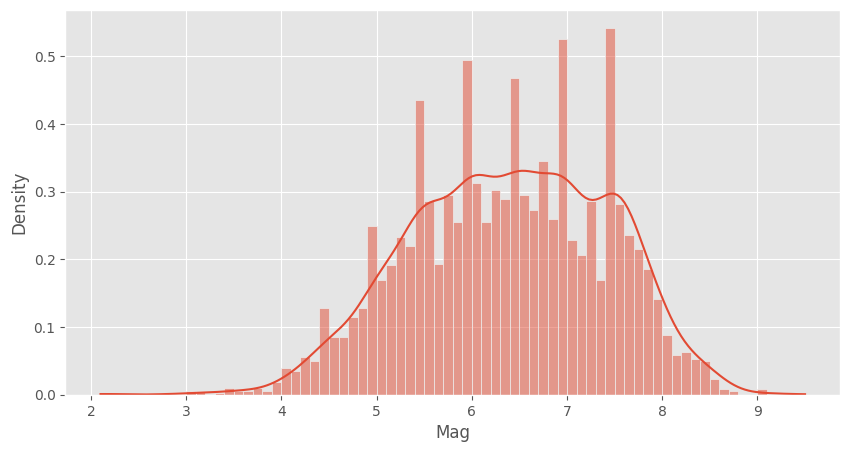

In [106]:
plt.figure(figsize=(10, 5))
sns.histplot(data=sismosSM, x='Mag', stat='density', binwidth=0.1, kde=True)
plt.show()

Em função da longitude e latitude vamos localizar cada sismo

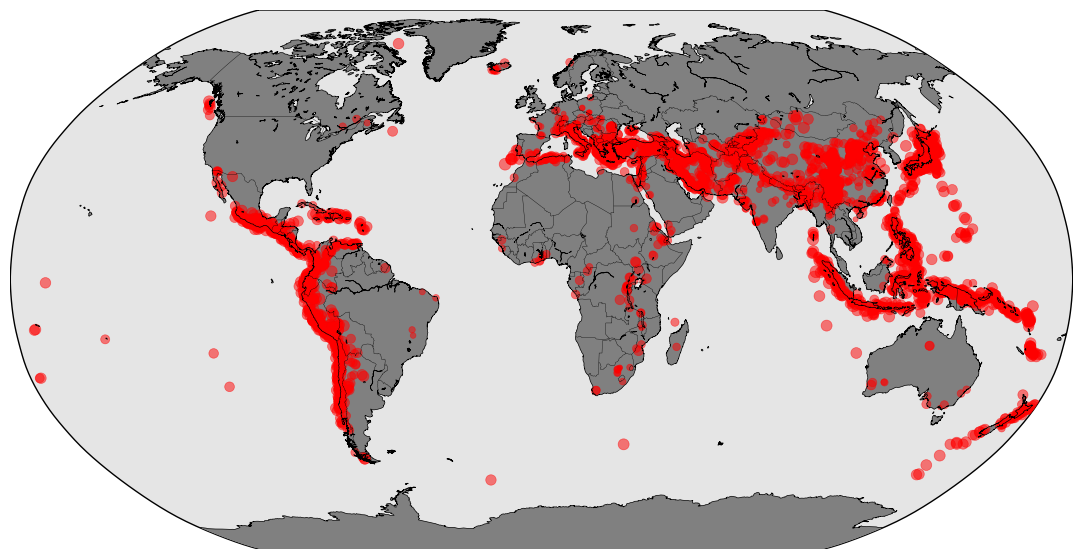

In [107]:
plt.figure(figsize=(14, 7))

# create a new map
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0, lat_0=0, lon_0=0)

# draw coastlines, country boundaries, and fill the continents.
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='gray')

# convert latitude and longitude to map coordinates
x, y = map(sismosSM["Longitude"].values, sismosSM["Latitude"].values)

# plot the earthquake data
map.scatter(x, y, s=sismosSM["Mag"].values**2, c='red', alpha=0.5)

# show the map
plt.show()

Vendo a importancia entre cada variavel

In [108]:
# Correlação de Pearson
sismosSM.corr(method = 'pearson')

Year  Latitude  Longitude  Focal Depth (km)  \
Year                    1.000000 -0.165146  -0.031206          0.042434   
Latitude               -0.165146  1.000000   0.150169         -0.132878   
Longitude              -0.031206  0.150169   1.000000         -0.056600   
Focal Depth (km)        0.042434 -0.132878  -0.056600          1.000000   
Mag                    -0.142766 -0.265713  -0.009970          0.215706   
Total Deaths           -0.068216  0.058685  -0.010155         -0.029044   
Total Missing           0.014166 -0.005838  -0.037649         -0.014772   
Total Injuries          0.037919  0.018946  -0.010521         -0.025144   
Total Damage ($Mil)     0.037880  0.006982  -0.000166         -0.027138   
Total Houses Destroyed  0.030505  0.041040   0.035837         -0.033611   
Total Houses Damaged    0.037689 -0.004047  -0.007716         -0.008239   

                             Mag  Total Deaths  Total Missing  Total Injuries  \
Year                   -0.142766     -0.068216       0.014166        0.037919   
Latitude               -0.265713      0.058685      -0.005838        0.018946   
Longitude              -0.009970     -0.010155      -0.037649       -0.010521   
Focal Depth (km)        0.215706     -0.029044      -0.014772       -0.025144   
Mag                     1.000000      0.141856      -0.025408        0.063019   
Total Deaths            0.141856      1.000000       0.011754        0.205672   
Total Missing          -0.025408      0.011754       1.000000        0.076997   
Total Injuries          0.063019      0.205672       0.076997        1.000000   
Total Damage ($Mil)     0.059714      0.074806       0.043823        0.261270   
Total Houses Destroyed  0.051640      0.128154       0.013278        0.214468   
Total Houses Damaged    0.061130      0.041385       0.102423        0.292631   

                        Total Damage ($Mil)  Total Houses Destroyed  \
Year                               0.037880                0.030505   
Latitude                           0.006982                0.041040   
Longitude                         -0.000166                0.035837   
Focal Depth (km)                  -0.027138               -0.033611   
Mag                                0.059714                0.051640   
Total Deaths                       0.074806                0.128154   
Total Missing                      0.043823                0.013278   
Total Injuries                     0.261270                0.214468   
Total Damage ($Mil)                1.000000                0.141321   
Total Houses Destroyed             0.141321                1.000000   
Total Houses Damaged               0.394348                0.264079   

                        Total Houses Damaged  
Year                                0.037689  
Latitude                           -0.004047  
Longitude                          -0.007716  
Focal Depth (km)                   -0.008239  
Mag                                 0.061130  
Total Deaths                        0.041385  
Total Missing                       0.102423  
Total Injuries                      0.292631  
Total Damage ($Mil)                 0.394348  
Total Houses Destroyed              0.264079  
Total Houses Damaged                1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

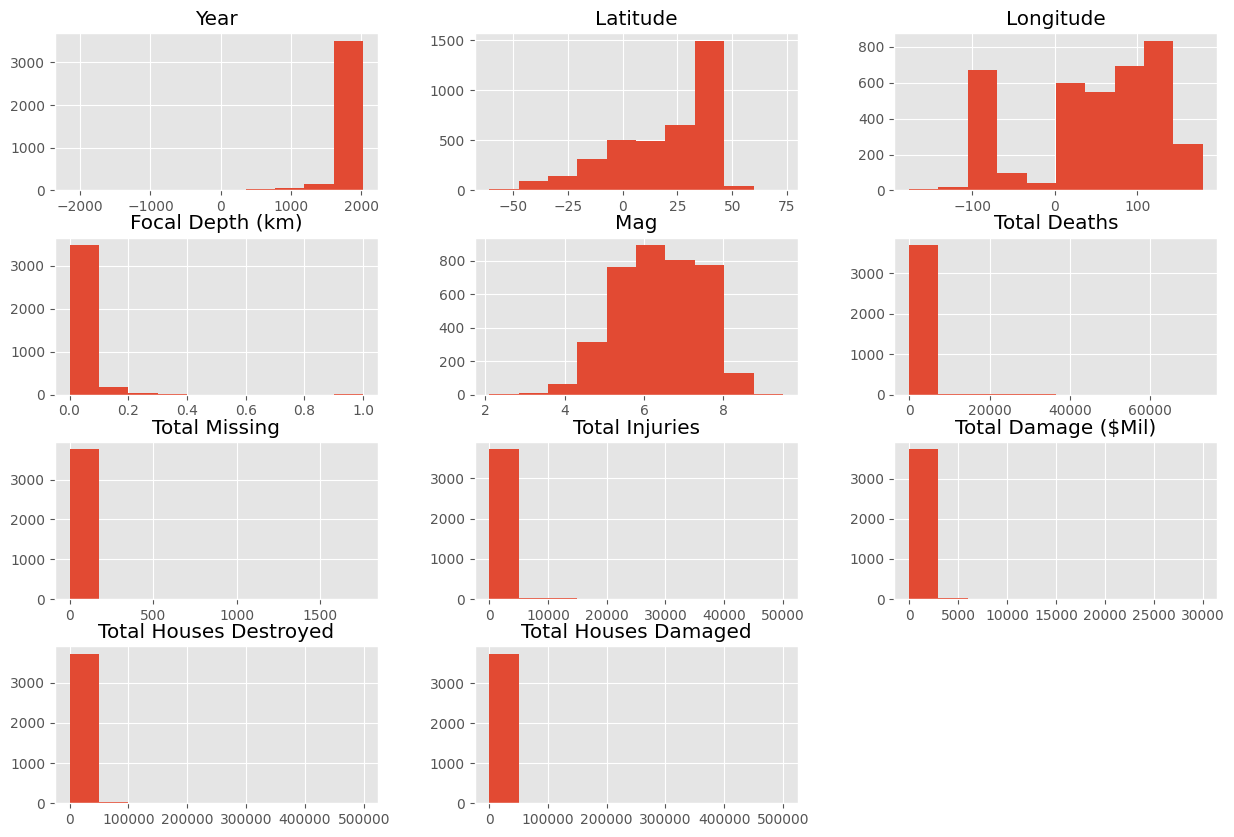

In [109]:
# Histograma
sismosSM.hist(figsize = (15,10))
plt.show

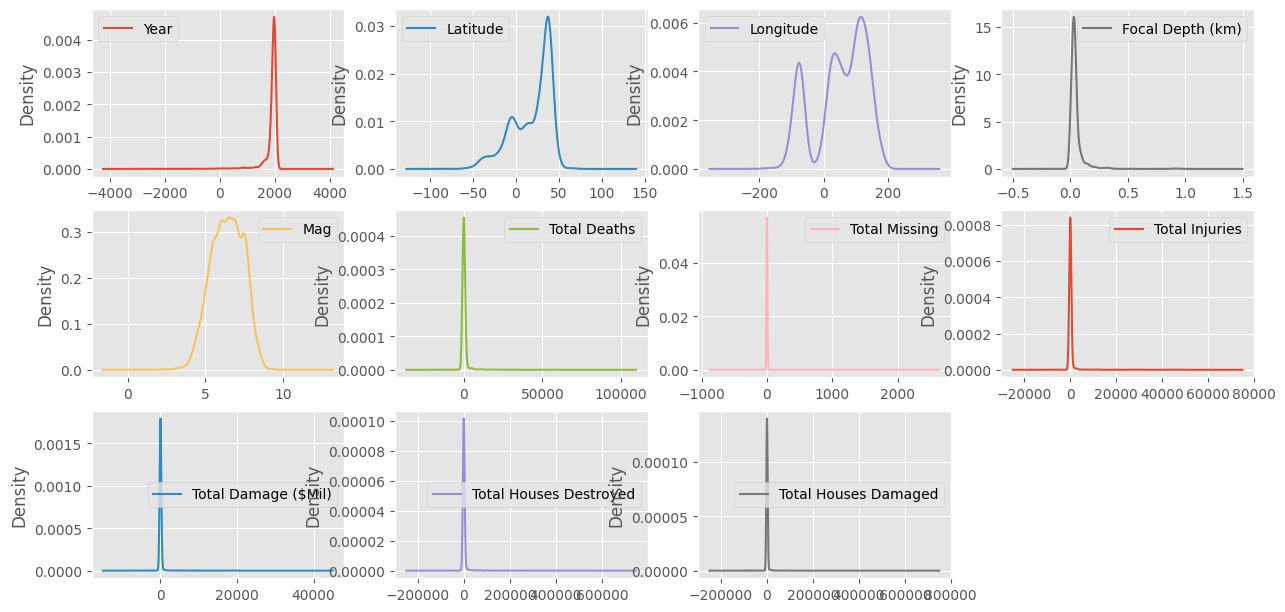

In [110]:
# Density Plot
sismosSM.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

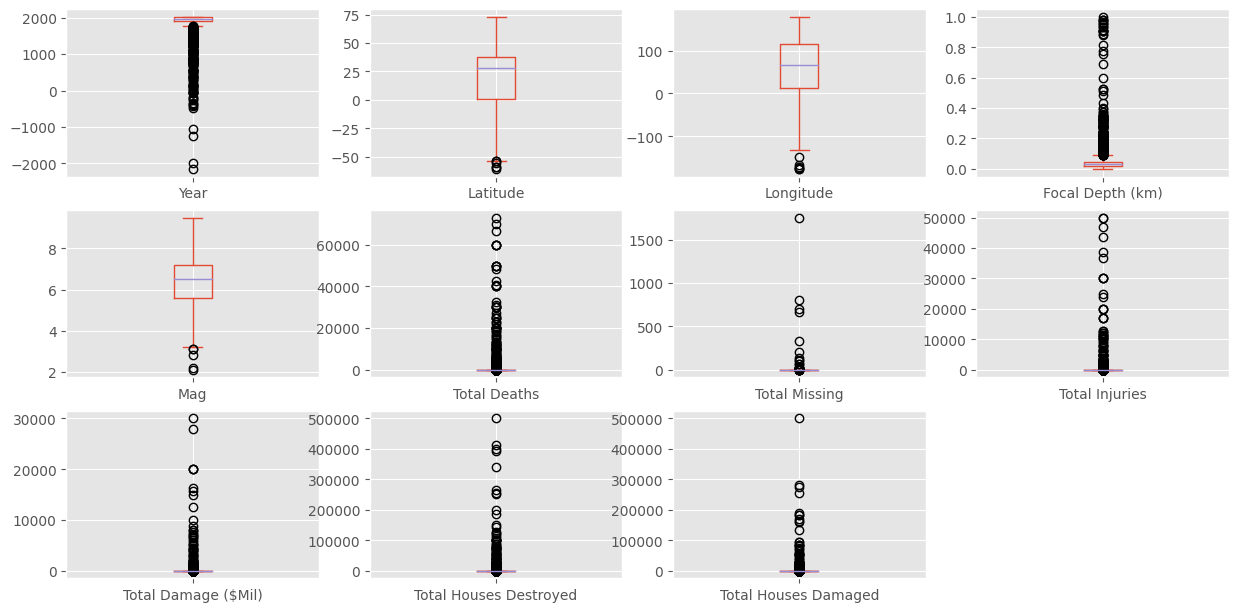

In [111]:
# Boxplot
sismosSM.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

<Axes: xlabel='Mag', ylabel='Continents'>

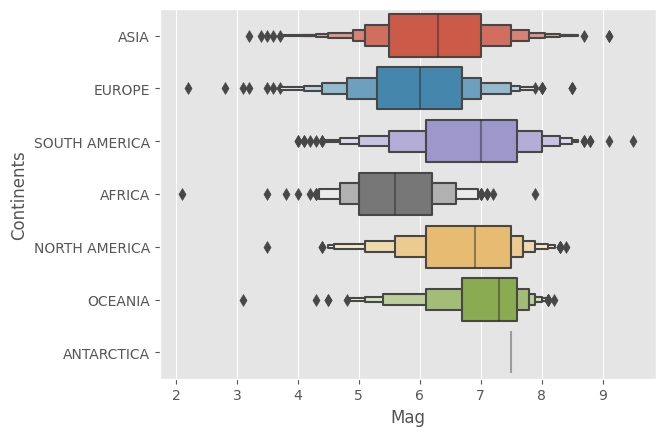

In [112]:
#Relação entre magnitude pelo continente
sns.boxenplot(data=sismosSM, x="Mag", y="Continents")

Observamos que existe uma boa concentração de valores em Asia e America do Sul

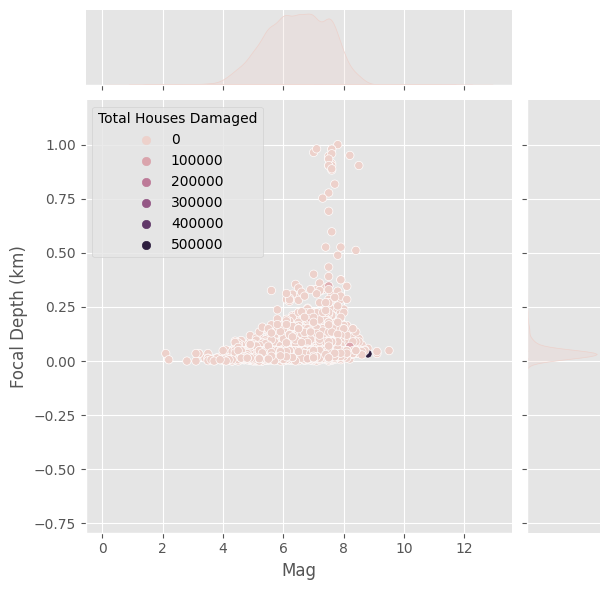

In [113]:
sns.jointplot(data=sismosSM, x="Mag", y="Focal Depth (km)", hue="Total Houses Damaged")

Observamos que a maior quantidade de dano é entre as magnitudes 6 e 8, e quando esta próximo do foco de energia, que é lógico em nosso problema.

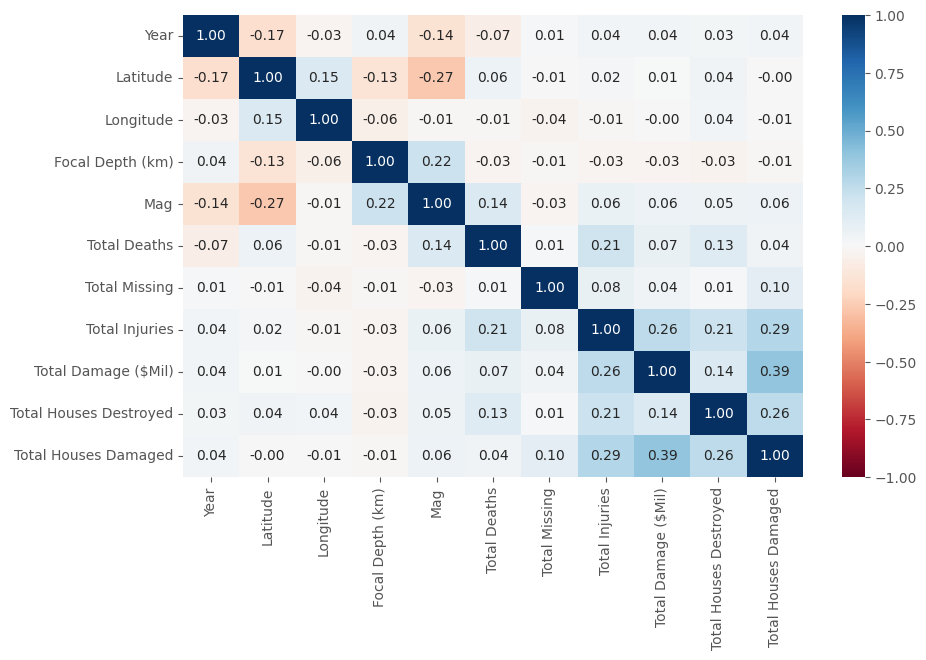

In [114]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(sismosSM.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1, fmt=".2f");

Existe uma boa relação entre a magnitude e missings

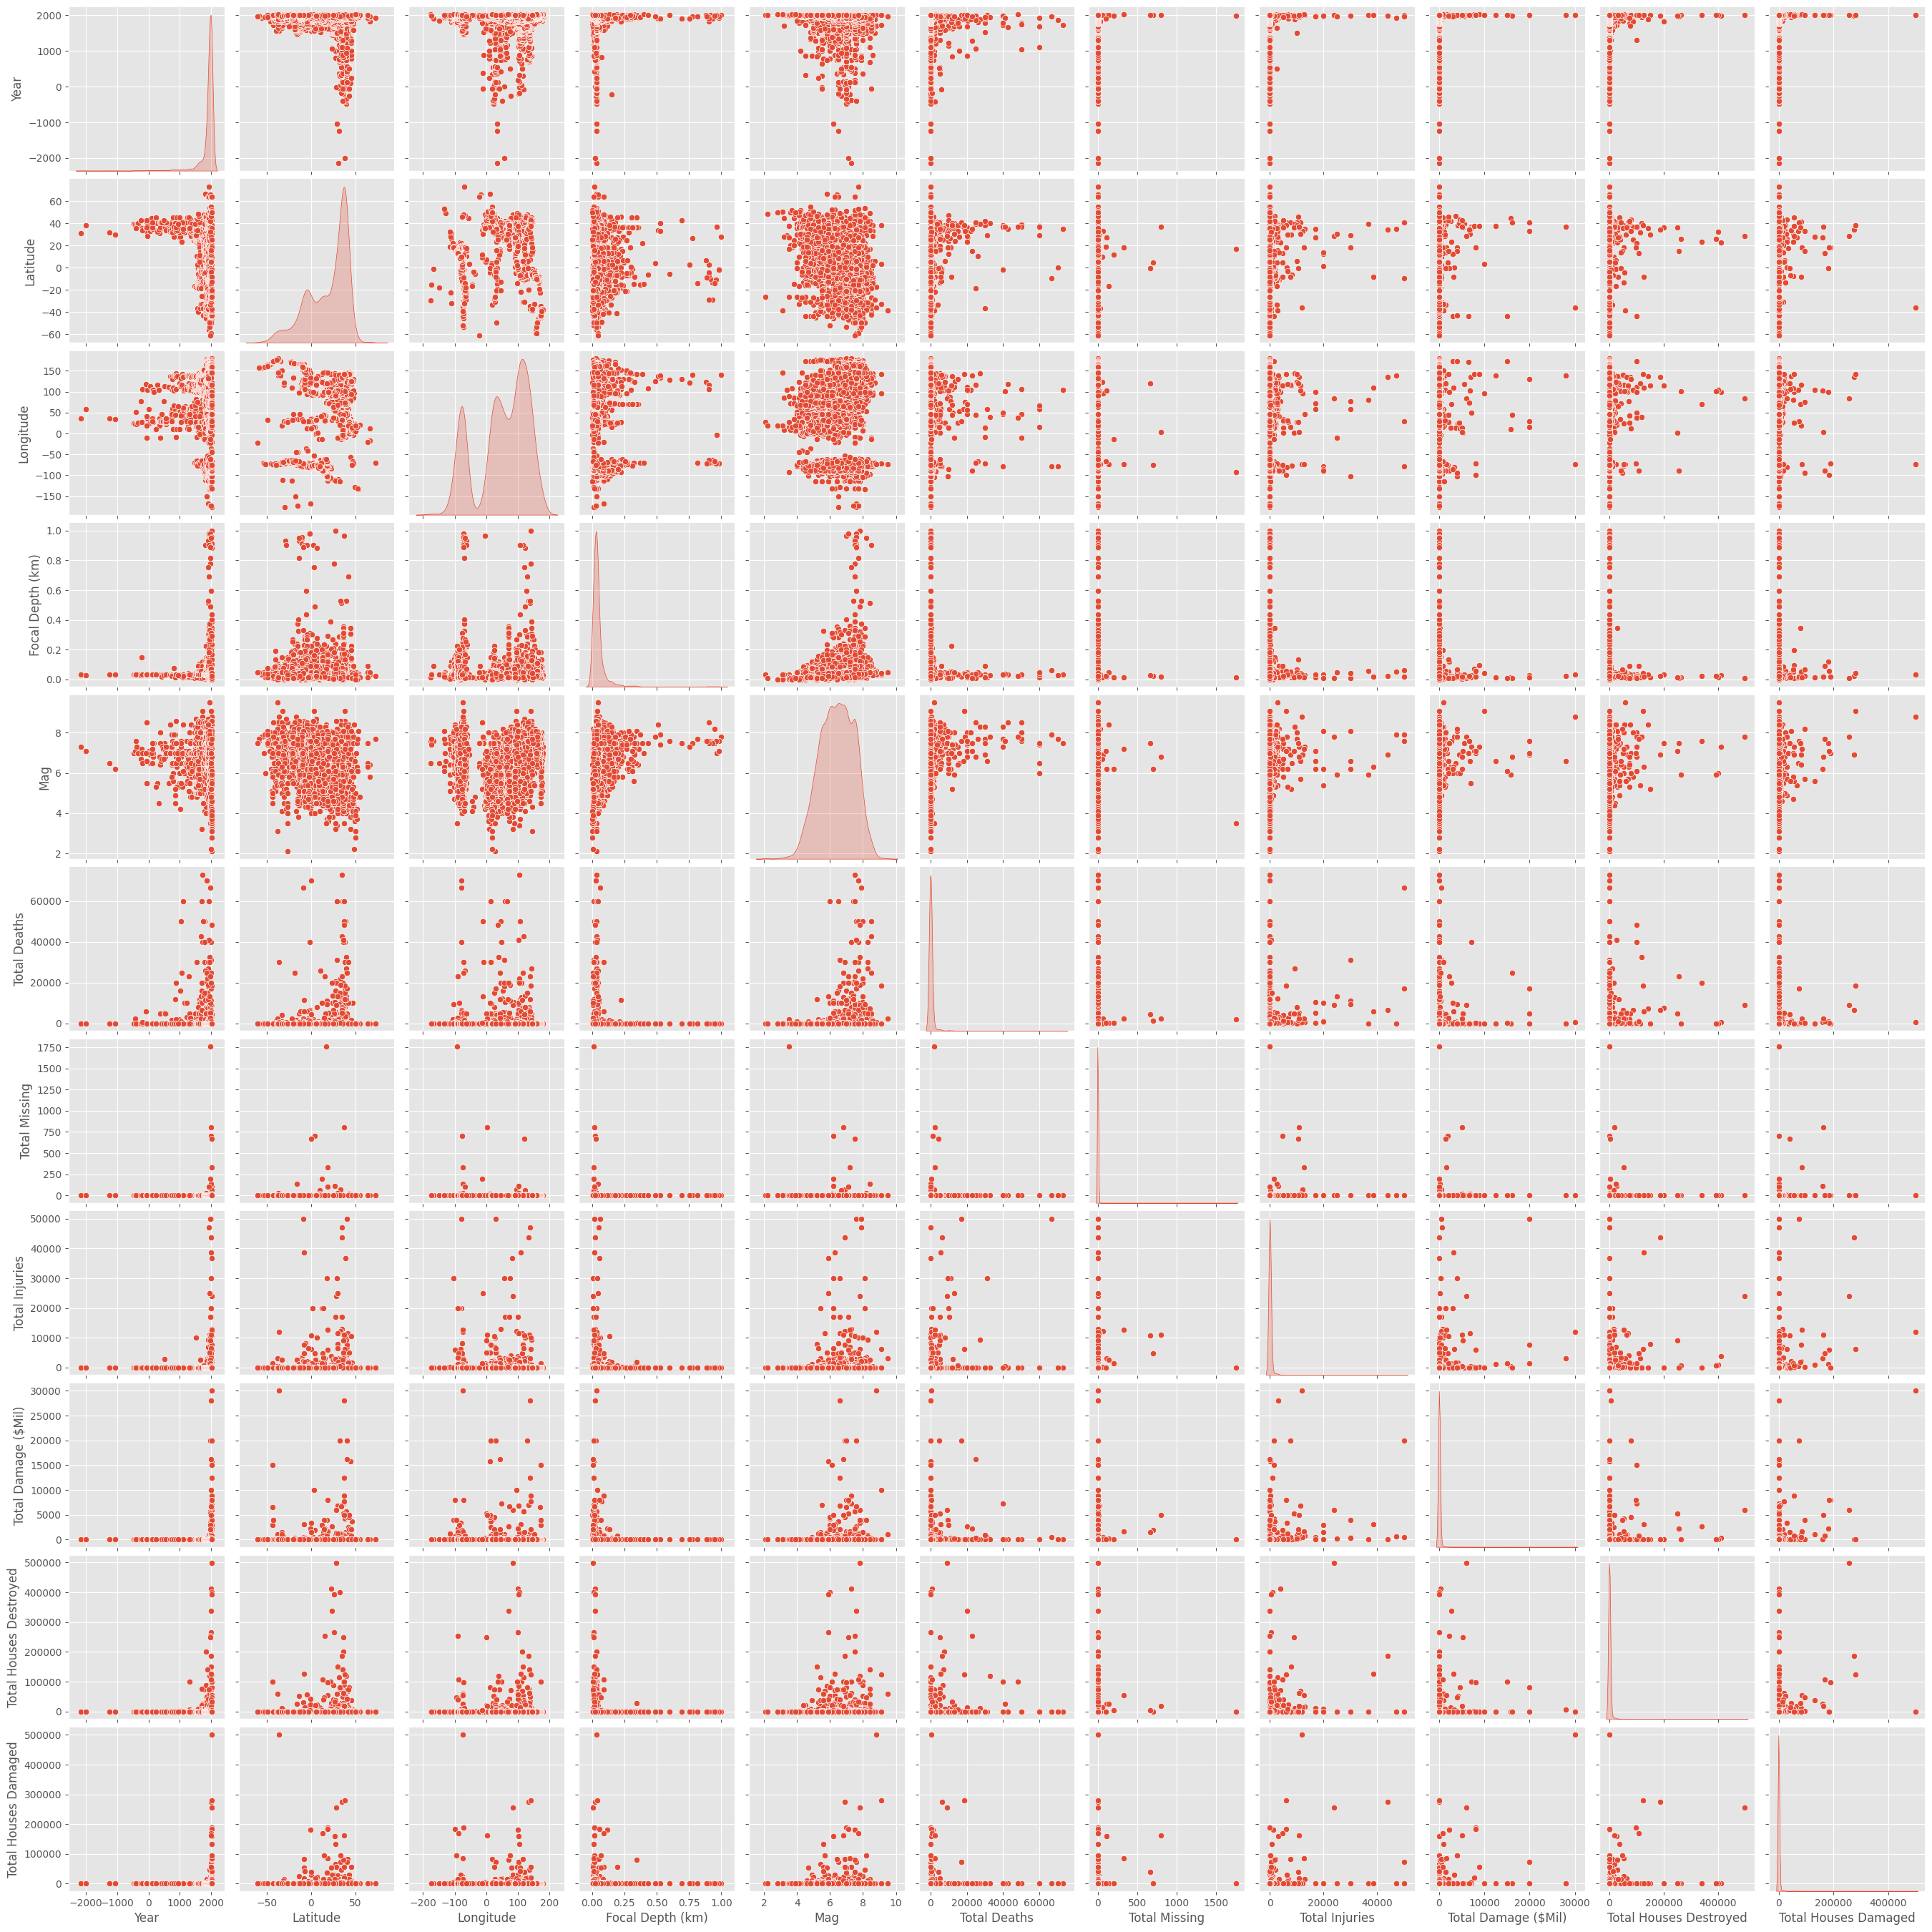

In [115]:
# Scatter Plot com Seaborn
sns.pairplot(sismosSM, diag_kind="kde")

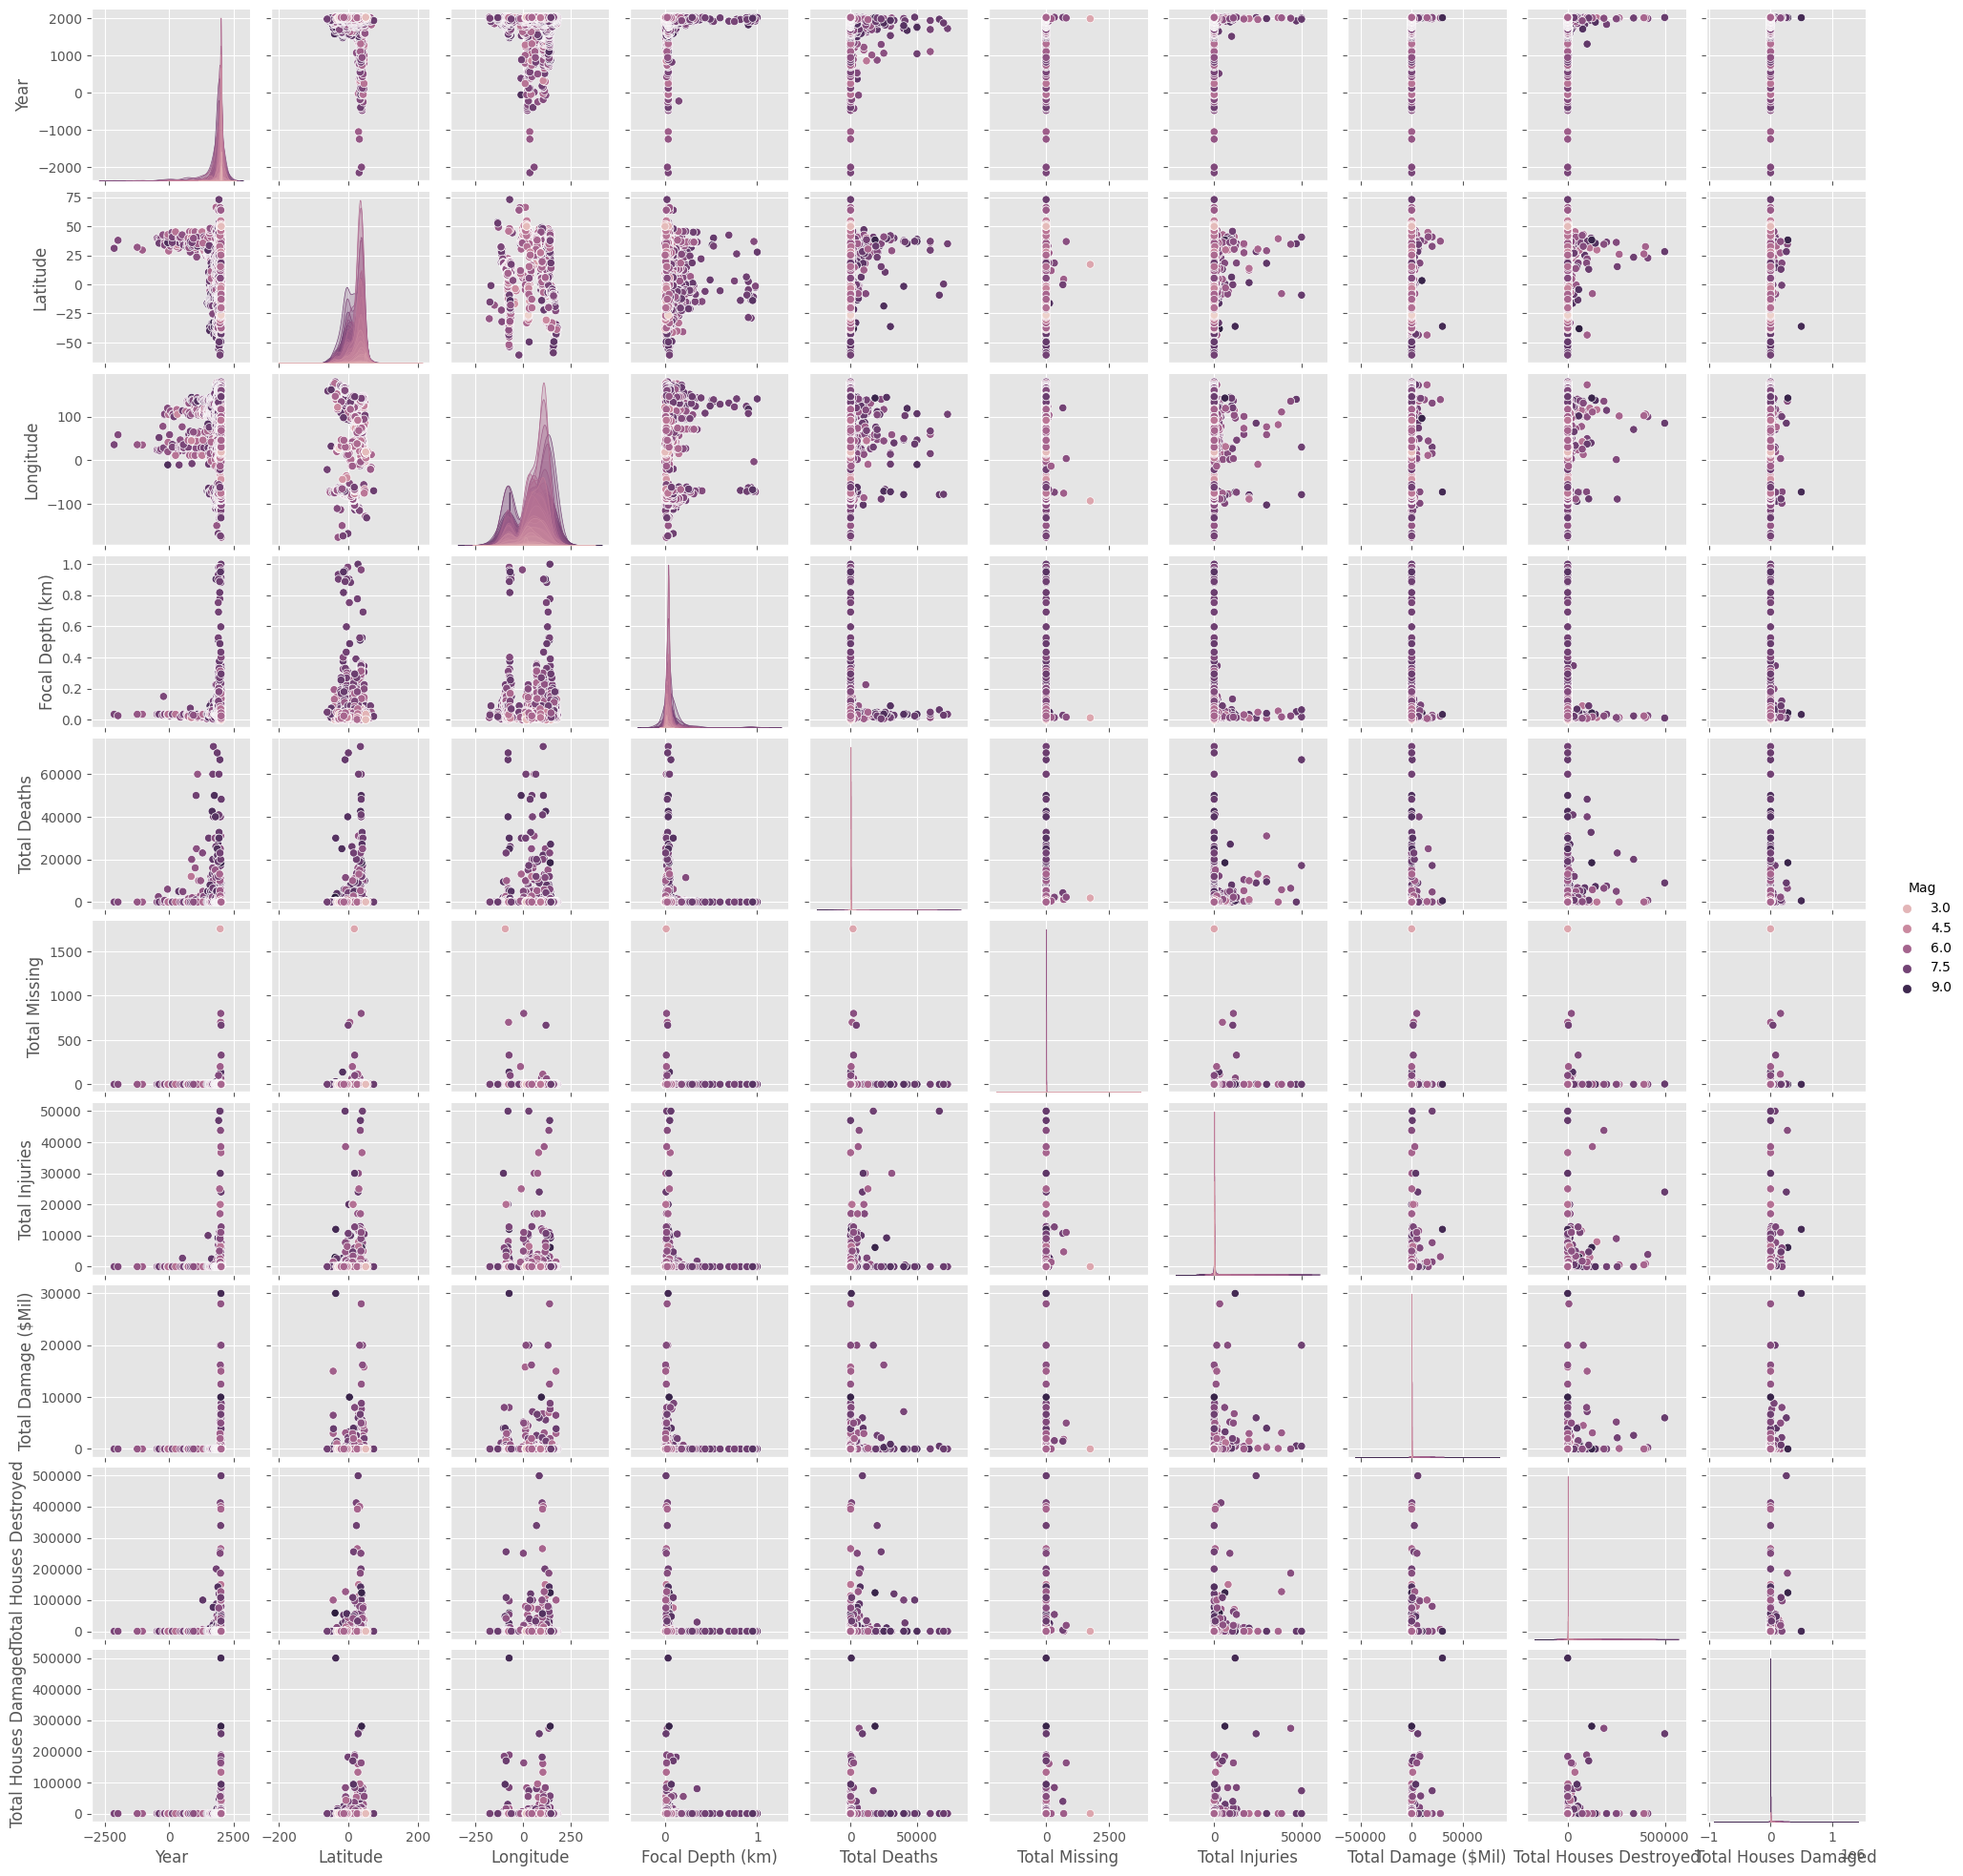

In [116]:
# Scatter Plot com Seaborn - relacionado com magnitude
sns.pairplot(sismosSM, hue = "Mag", height = 2, diag_kind="kde")

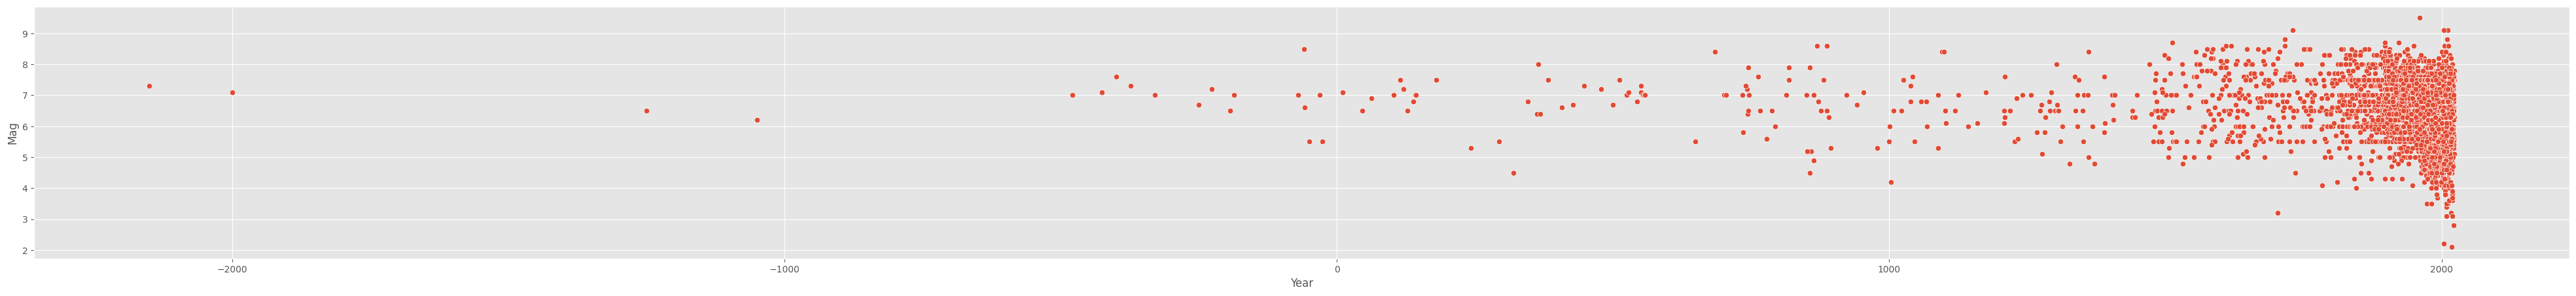

In [117]:
#Anos vs sismos para verificar as distribuições de informações por ano
plt.figure(figsize=(50, 5))
sns.scatterplot(data=sismosSM, x='Year', y='Mag')
plt.show()

Observamos que tem maior quantidade de registros nos últimos anos

In [118]:
sismosSM.replace(np.nan, 0,  inplace=True)
sismosSM.head(10)

Year                                    Location Name  Latitude  \
0 -2150.0                    JORDAN:  BAB:A:DARAA:AL:KARAK    31.100   
1 -1050.0                 JORDAN:  SW:  TIMNA COPPER MINES    29.600   
2   362.0                                JORDAN:  AL:KARAK    31.300   
3  1834.0   JORDAN:  AL:KARAK: ISRAEL:  JERUSALEM: NABULUS    31.300   
4  2004.0  JORDAN:  MA'IN: ISRAEL:  JERUSALEM: PETAH:TIQWA    31.675   
5 -2000.0                                 TURKMENISTAN:  W    38.000   
6    10.0                              TURKMENISTAN:  NISA    38.000   
7   953.0                              TURKMENISTAN:  NISA    38.000   
8  1175.0                                     TURKMENISTAN    37.500   
9  1208.0                        TURKMENISTAN:  GURGANDZHE    42.000   

   Longitude  Focal Depth (km)  Mag  Total Deaths  Total Missing  \
0     35.500          0.034691  7.3           0.0            0.0   
1     35.000          0.034691  6.2           0.0            0.0   
2     35.600          0.034691  6.4           0.0            0.0   
3     35.600          0.034691  6.3           0.0            0.0   
4     35.551          0.039216  5.3           0.0            0.0   
5     58.200          0.025641  7.1           1.0            0.0   
6     58.300          0.025641  7.1           0.0            0.0   
7     58.300          0.025641  7.1           0.0            0.0   
8     65.500          0.021116  7.1           0.0            0.0   
9     60.000          0.013575  6.1           0.0            0.0   

   Total Injuries  Total Damage ($Mil)  Total Houses Destroyed  \
0             0.0                  0.0                     0.0   
1             0.0                  0.0                     0.0   
2             0.0                  0.0                     0.0   
3             0.0                  0.0                     0.0   
4             4.0                  0.0                     0.0   
5             0.0                  0.0                     0.0   
6             0.0                  0.0                     0.0   
7             0.0                  0.0                     0.0   
8             0.0                  0.0                     0.0   
9             0.0                  0.0                     0.0   

   Total Houses Damaged       Country Continents  
0                   0.0        JORDAN       ASIA  
1                   0.0        JORDAN       ASIA  
2                   0.0        JORDAN       ASIA  
3                   0.0        JORDAN       ASIA  
4                   0.0        JORDAN       ASIA  
5                   0.0  TURKMENISTAN       ASIA  
6                   0.0  TURKMENISTAN       ASIA  
7                   0.0  TURKMENISTAN       ASIA  
8                   0.0  TURKMENISTAN       ASIA  
9                   0.0  TURKMENISTAN       ASIA

##**Conclusões***

* Foi realizado o tratamento, análise e estatiscas de dados e observado a necessidade destes passos para ter base de dados mais realistas;
* Os dados analisando por continente e paises foram coerentes pelo nosso conhecimento do assunto;
* Os dados em função de dano e magnitude foram coerentes.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------